---
<h1 style="text-align: center;">Projeto AMG:</h1>
<h2 style="text-align: center;">Análise de Qualidade de Vinhos</h2>

*Discentes:*

    *   Arthur Bezerra Calado
    *   Gabriel D'assumpção de Carvalho
    *   Pedro Henrique Sarmento de Paula

*Data:* 08/05/2024

---
---

# Introdução

O seguinte relatório vai estar utilizando a ([base de dados de vinho](https://archive.ics.uci.edu/dataset/186/wine+quality)), a qual é multivariada e contém diversas variáveis que descrevem as características físico-químicas de vinhos brancos e tintos, bem como sua qualidade atribuída por especialistas. As variáveis incluem medidas como acidez fixa, acidez volátil, teor alcoólico, entre outras.

| **Nome da variável**       | **Papel**          | **Tipo**       | **Descrição**                 | **Valores ausentes** |
|------------------------|----------------|------------|---------------------------|------------------|
| acidez fixa          | Característica | Contínuo   |                           | Não              |
| acidez volátil       | Característica | Contínuo   |                           | Não              |
| ácido cítrico            | Característica | Contínuo   |                           | Não              |
| açúcar residual         | Característica | Contínuo   |                           | Não              |
| Cloretos               | Característica | Contínuo   |                           | Não              |
| Dióxido de enxofre livre    | Característica | Contínuo   |                           | Não              |
| Dióxido de enxofre total   | Característica | Contínuo   |                           | Não              |
| densidade              | Característica | Contínuo   |                           | Não              |
| ph                     | Característica | Contínuo   |                           | Não              |
| Sulfatos               | Característica | Contínuo   |                           | Não              |
| álcool                 | Característica | Contínuo   |                           | Não              |
| qualidade              | Alvo           | Categórico    | escore entre 0 e 10       | Não              |
| Cor                    | Característica          | Categórico | vermelho (1) ou branco (0)        | Não              |


A primeira parte deste relatório consistirá em uma análise exploratória dos dados, com o objetivo de compreender melhor as 13 variáveis. Serão apresentados detalhes como mínimo, máximo, média, mediana, variância, possíveis outliers, assimetria/simetria.

Em seguida, avançaremos para a construção de quatro modelos de machine learning, utilizando as seguintes técnicas:

1) Arvores de decisão;

2) Bayesiano ingenuo;

3) Regressão logistica;

4) k-vizinhos.
  
A variável **qualidade** será utilizada como a variável resposta/dependente (y), fornecendo dados sobre a qualidade do vinho, variando de 0 (menor nota) a 10 (maior nota).

# Biblioteca utilizadas

1) Pandas -> manipulação de dados;

2) numpy -> cálculos estatísticos;

4) matplotlib -> gráficos;

5) seaborn -> gráficos;

6) scipy -> transformação de variável;

7) warnings -> remoção de avisos

In [ ]:
# Instalação das bibliotecas

# %pip install pandas

# %pip install ucimlrepo

# %pip install numpy

# %pip install scipy

# %pip install matplotlib

# %pip install seaborn

In [ ]:
# Importação das bibliotecas

import pandas as pd

import numpy as np

from scipy.stats import boxcox

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score



In [ ]:
# Desativa todos os avisos
warnings.filterwarnings("ignore")


# Análise Exploratória

In [ ]:
# Importando os dados
df = pd.read_csv(
    "https://raw.githubusercontent.com/gabrieldadcarvalho/machine_learning/main/wine_quality/wine_quality.csv",
    sep=",",
)

In [ ]:
# Obtendo as variáveis independentes e dependente
x = df.iloc[:, :12]
y = df.iloc[:, -1]  # Qualidade vinho

target = df['quality']
features = df.drop('quality', axis=1)

In [ ]:
# Criando variável que vai ter as variáveis transformada
x_trans = x

In [ ]:
# Verificando as 5 primeiras linhas de x e y
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  color  
0      9.4      1  
1      9.8      1  
2      9.8      1  
3      9.8      1  
4      9.4      1

In [ ]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

## Variáveis Explicativas
Vamos realizar uma análise exploratória das variáveis explicativas do conjunto de dados. Abaixo estão as estatísticas descritivas e visualizações para cada variável.

In [ ]:
pd.options.display.float_format = "{:.4f}".format
x.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count      6497.0000         6497.0000    6497.0000       6497.0000   
mean          7.2153            0.3397       0.3186          5.4432   
std           1.2964            0.1646       0.1453          4.7578   
min           3.8000            0.0800       0.0000          0.6000   
25%           6.4000            0.2300       0.2500          1.8000   
50%           7.0000            0.2900       0.3100          3.0000   
75%           7.7000            0.4000       0.3900          8.1000   
max          15.9000            1.5800       1.6600         65.8000   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
count  6497.0000            6497.0000             6497.0000 6497.0000   
mean      0.0560              30.5253              115.7446    0.9947   
std       0.0350              17.7494               56.5219    0.0030   
min       0.0090               1.0000                6.0000    0.9871   
25%       0.0380              17.0000               77.0000    0.9923   
50%       0.0470              29.0000              118.0000    0.9949   
75%       0.0650              41.0000              156.0000    0.9970   
max       0.6110             289.0000              440.0000    1.0390   

             pH  sulphates   alcohol     color  
count 6497.0000  6497.0000 6497.0000 6497.0000  
mean     3.2185     0.5313   10.4918    0.2461  
std      0.1608     0.1488    1.1927    0.4308  
min      2.7200     0.2200    8.0000    0.0000  
25%      3.1100     0.4300    9.5000    0.0000  
50%      3.2100     0.5100   10.3000    0.0000  
75%      3.3200     0.6000   11.3000    0.0000  
max      4.0100     2.0000   14.9000    1.0000

### Dados Faltantes

Como pode ser visto na descrição das variáveis explicativas, todas elas possuem 6497 observações, portanto nenhuma possui dados faltantes.

### Acidez Fixa

In [ ]:
x["fixed acidity"].describe()

count   6497.0000
mean       7.2153
std        1.2964
min        3.8000
25%        6.4000
50%        7.0000
75%        7.7000
max       15.9000
Name: fixed acidity, dtype: float64

In [ ]:
x["fixed acidity"].mode()

0   6.8000
Name: fixed acidity, dtype: float64

Ao analisarmos em detalhes os dados relativos à acidez fixa, percebemos que a maioria dos vinhos possui uma acidez próxima de 7.22, variando entre 3.8 e 15.9. Este intervalo considerável é acompanhado por um desvio padrão de aproximadamente 1.3, indicando uma dispersão significativa dos valores. Assim, a maioria dos vinhos é encontrada dentro da faixa de acidez entre 5.92 e 8.52.

É importante destacar que a média supera tanto a mediana (7) quanto a moda (6.8), sugerindo uma assimetria positiva nos dados.

Para explorar eventuais outliers e a natureza da assimetria nos dados, a proposta é utilizar tanto um histograma quanto um boxplot.

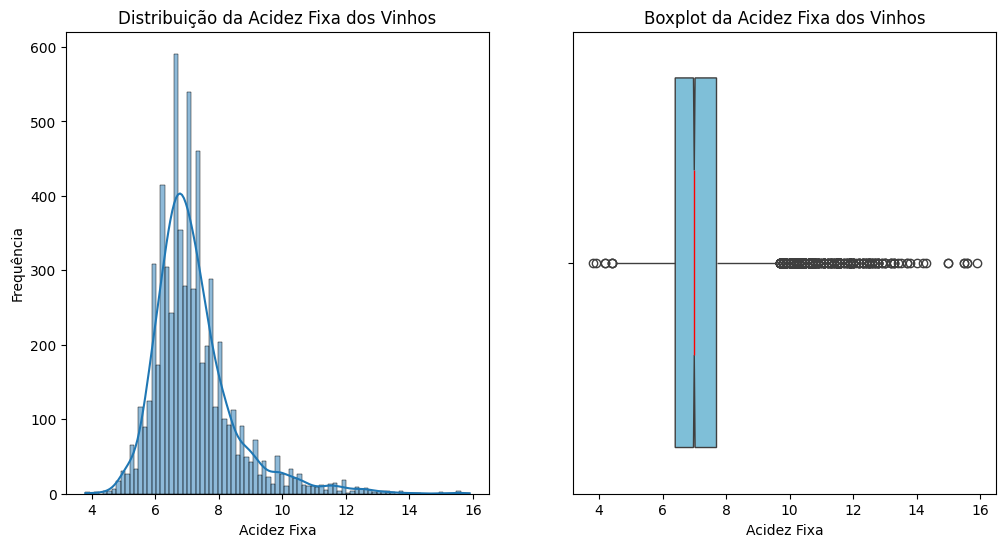

In [ ]:
# Criação do grafico histograma para a variável 'fixed acidity'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["fixed acidity"], kde=True)
plt.title("Distribuição da Acidez Fixa dos Vinhos")
plt.xlabel("Acidez Fixa")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x["fixed acidity"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Acidez Fixa dos Vinhos")
plt.xlabel("Acidez Fixa")
plt.show()

A análise do histograma e do boxplot podemos ver a assimetria possitiva mencionada acima, para tratar dos possíveis outliers e a assemetria nos dados mais para frente vamos propor uma transformação na variável.

### Acidez Volátil

In [ ]:
x["volatile acidity"].describe()

count   6497.0000
mean       0.3397
std        0.1646
min        0.0800
25%        0.2300
50%        0.2900
75%        0.4000
max        1.5800
Name: volatile acidity, dtype: float64

In [ ]:
# Calculando a moda da acidez fixa
moda_acid_v = x["volatile acidity"].mode()
moda_acid_v

0   0.2800
Name: volatile acidity, dtype: float64

Ao verificar as estatística da acidez volátil, é possível dizer que os vinhos tem uma acidez volátil em torno de 0.34, variando entre 0.08 e 1.58. Entretando, o seu desvio padrão é de 0.165, indicando que a grande parte dos vinhos tem essa acidez entre 0.175 e 0.505.

Ainda podemos ver que a média é maior do que a mediana (0.29) e moda (0.28), indicando um assimetria possitiva nos dados.

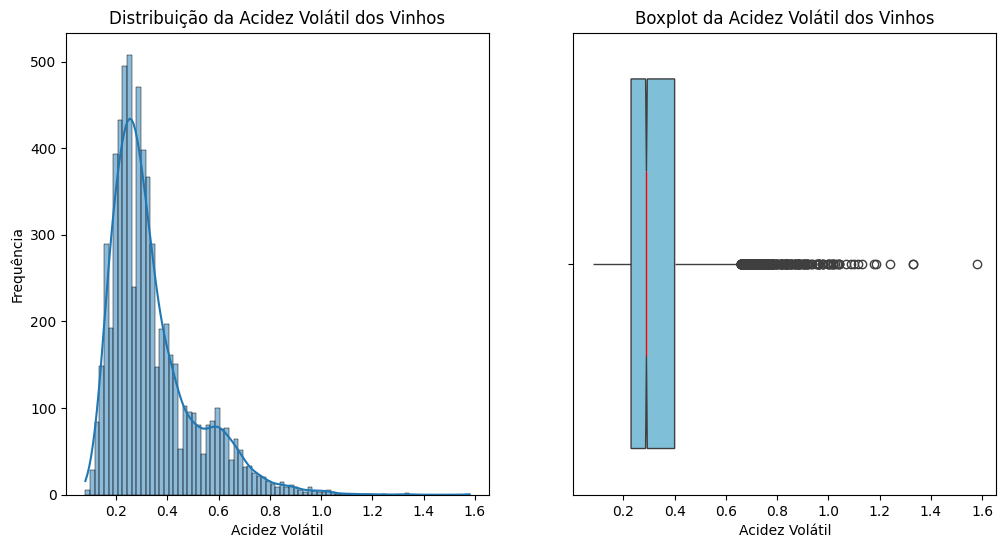

In [ ]:
# Criação do grafico histograma para a variável 'fixed acidity'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["volatile acidity"], kde=True)
plt.title("Distribuição da Acidez Volátil dos Vinhos")
plt.xlabel("Acidez Volátil")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x["volatile acidity"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Acidez Volátil dos Vinhos")
plt.xlabel("Acidez Volátil")
plt.show()

Observando o gráfico de histograma e o boxplot da variável de acidez volátil, podemos ver que essa varíavel possui uma assimetria positiva nos seus dados, afim de melhorar isso ao decorrer da análise vamos propor uma transformação tentar corrigir essa assimetria possitiva.

### Ácido Cítrico

In [ ]:
x["citric acid"].describe()

count   6497.0000
mean       0.3186
std        0.1453
min        0.0000
25%        0.2500
50%        0.3100
75%        0.3900
max        1.6600
Name: citric acid, dtype: float64

In [ ]:
x["citric acid"].mode()

0   0.3000
Name: citric acid, dtype: float64

Ao analisarmos a descrição da variável de ácido cítrico, a média dessa variável é de aproximadamente 0.334, com um desvio padrão de cerca de 0.1454, o que sugere que a maioria dos dados está concentrada no intervalo entre 0.1956 e 0.4864. Também é possivel notar que seus valores variam entre 0 e 1.66.

Além disso, a mediana é de 0.31, estando próxima a média mas um pouco menor. Vale ressaltar também que a distância do 1º quartil à mediana é menor do que a do 3º quartil, o que sugere uma assimetria positiva dos dados, com uma concentração maior de observações à esquerda.

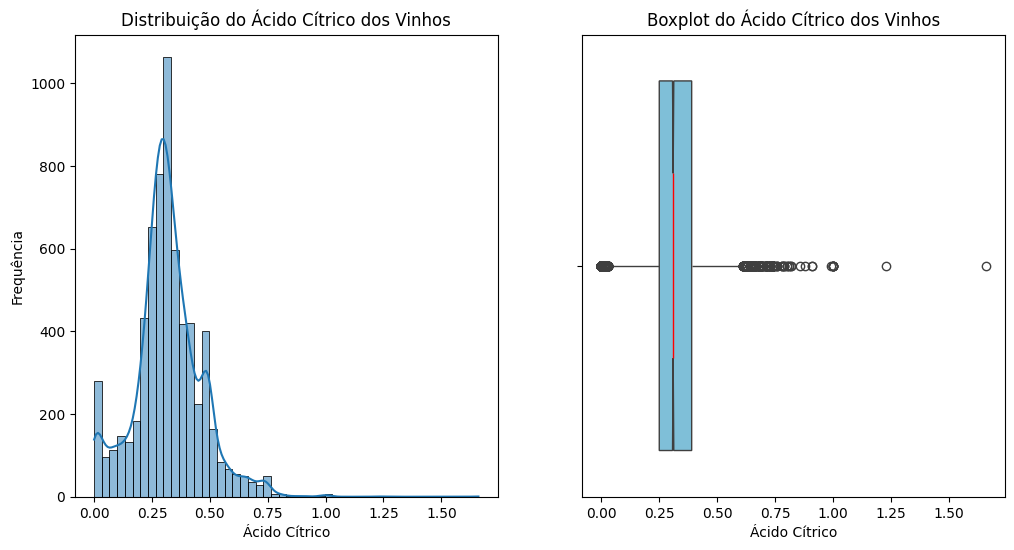

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["citric acid"], kde=True, bins=50)
plt.title("Distribuição do Ácido Cítrico dos Vinhos")
plt.xlabel("Ácido Cítrico")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x["citric acid"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot do Ácido Cítrico dos Vinhos")
plt.xlabel("Ácido Cítrico")
plt.show()

Observando o gráfico de histograma e o boxplot, podemos ver que essa varíavel possui uma assimetria positiva nos seus dados. Para melhorar a qualidade da distribuição das variáveis descrita acima, vamos propor uma combinação nessas variáveis.

### Transformação nas Variáveis de Acidez

Como vimos nos 3 tôpicos acima, as variáveis de acidez possui alguns anomalias nas suas distribuição, contendo muitos outliers que distorcem a sua distribuição. Afim de melhorar isso, foi proposto uma transformação para criar uma nova variável **(total acidity)**.

In [ ]:
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         7.4000            0.7000       0.0000          1.9000     0.0760   
1         7.8000            0.8800       0.0000          2.6000     0.0980   
2         7.8000            0.7600       0.0400          2.3000     0.0920   
3        11.2000            0.2800       0.5600          1.9000     0.0750   
4         7.4000            0.7000       0.0000          1.9000     0.0760   

   free sulfur dioxide  total sulfur dioxide  density     pH  sulphates  \
0              11.0000               34.0000   0.9978 3.5100     0.5600   
1              25.0000               67.0000   0.9968 3.2000     0.6800   
2              15.0000               54.0000   0.9970 3.2600     0.6500   
3              17.0000               60.0000   0.9980 3.1600     0.5800   
4              11.0000               34.0000   0.9978 3.5100     0.5600   

   alcohol  color  
0   9.4000      1  
1   9.8000      1  
2   9.8000      1  
3   9.8000      1  
4   9.4000      1

In [ ]:
# Criação da nova variável
x_trans["total acidity"] = np.log(
    x["volatile acidity"] * x["fixed acidity"] + x["citric acid"]
)**(1/1.5)
# x_trans = x_trans.drop(columns=['fixed acidity', 'volatile acidity', 'citric acid'])
x_trans["total acidity"].fillna(0, inplace=True)

In [ ]:
# Estatística da nova variável
x_trans["total acidity"].describe()

count   6497.0000
mean       0.9309
std        0.3009
min        0.0000
25%        0.7326
50%        0.9064
75%        1.1311
max        1.8543
Name: total acidity, dtype: float64

Podemos avaliar as estatísticas descritivas da nova variável para determinar a simetria dos dados. Quando a média se aproxima da mediana e os valores do primeiro e terceiro quartis estão próximos da média mais ou menos um desvio padrão, isso sugere uma distribuição simétrica dos dados. Essa proximidade entre a média e a mediana, juntamente com a distribuição equilibrada em torno dos quartis, indica uma disposição uniforme dos dados ao redor da medida central. Essa simetria é um indicativo valioso, pois sugere que os dados não são excessivamente influenciados por valores extremos e estão distribuídos de maneira mais uniforme.

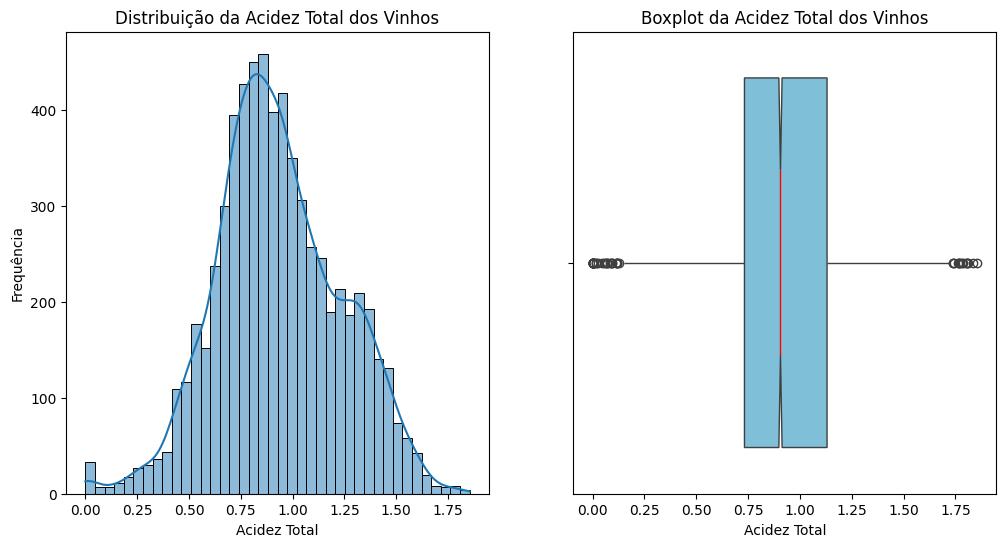

In [ ]:
# Histograma total_acidity
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x_trans["total acidity"], kde=True, bins=40)
plt.title("Distribuição da Acidez Total dos Vinhos")
plt.xlabel("Acidez Total")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x_trans["total acidity"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Acidez Total dos Vinhos")
plt.xlabel("Acidez Total")
plt.show()

Podemos observar que a assimetria nos dados dessa nova variável apresenta uma distribuição mais simétrica. Esse resultado fortalece nossas expectativas e nos fornece uma base sólida para ajustar os modelos de aprendizado de máquina no futuro. Uma distribuição mais simétrica sugere uma representação mais equilibrada dos dados, o que é fundamental para garantir a eficácia e a robustez dos modelos que serão aplicados.

### Açucar Residual

In [ ]:
x["residual sugar"].describe()

count   6497.0000
mean       5.4432
std        4.7578
min        0.6000
25%        1.8000
50%        3.0000
75%        8.1000
max       65.8000
Name: residual sugar, dtype: float64

In [ ]:
x["residual sugar"].mode()

0   2.0000
Name: residual sugar, dtype: float64

Ao analisar as medidas da variável de açúcar residual, observamos que a média é de aproximadamente 5.44, com um desvio padrão considerável de 4.76. Isso sugere que a maioria dos dados está concentrada em torno do intervalo de 0.68 a 10.02.

Além disso, notamos que a moda da variável é de 2, o que é menor do que a mediana e a média. Essa diferença sugere uma assimetria positiva na distribuição dos dados, indicando que há uma maior concentração de valores abaixo da média.

Também notamos a presença de uma observação bastante elevada de 65.8. Isso sugere a possibilidade de um erro na coleta dos dados ou de uma observação anômala significativa, o que pode afetar negativamente a análise descritiva. Essa observação atípica tende a aumentar significativamente tanto o desvio padrão quanto a média dos dados, distorcendo a compreensão da distribuição geral.

Para uma melhor visualização e compreensão desse outlier, será apresentado um gráfico de box-plot e histograma.

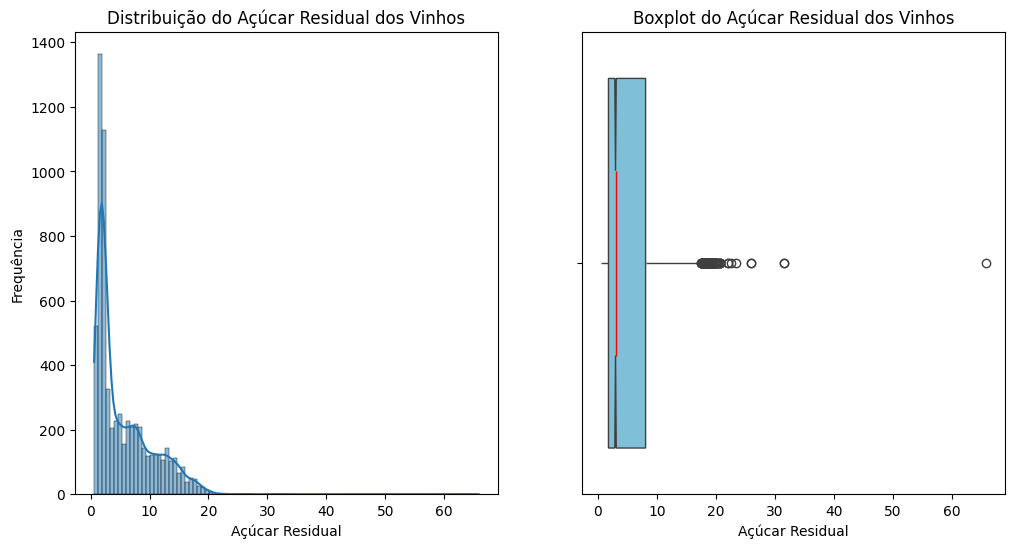

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["residual sugar"], kde=True)
plt.title("Distribuição do Açúcar Residual dos Vinhos")
plt.xlabel("Açúcar Residual")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x["residual sugar"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot do Açúcar Residual dos Vinhos")
plt.xlabel("Açúcar Residual")
plt.show()

Podemos observar que a observação com um valor de açúcar residual de 65 é extremamente atípica em comparação com o restante dos dados. Diante disso, podemos propor a remoção dessa observação para avaliar seu impacto nas estatísticas descritivas. Essa abordagem nos permitirá entender melhor como essa observação influencia as medidas de tendência central e dispersão dos dados, ajudando a garantir uma análise mais precisa e confiável.

In [ ]:
# Removendo outlier
loc_out = x[x["residual sugar"] == 65.8]
x_remove_out = x.drop(loc_out.index[0])

In [ ]:
x["residual sugar"].describe()

count   6497.0000
mean       5.4432
std        4.7578
min        0.6000
25%        1.8000
50%        3.0000
75%        8.1000
max       65.8000
Name: residual sugar, dtype: float64

In [ ]:
x_remove_out["residual sugar"].describe()

count   6496.0000
mean       5.4339
std        4.6989
min        0.6000
25%        1.8000
50%        3.0000
75%        8.1000
max       31.6000
Name: residual sugar, dtype: float64

Após verificar a descrição da variável, constatamos que a remoção do outlier não trouxe uma melhora significativa nos resultados. Portanto, decidimos voltar à modelagem sem a remoção do outlier. Esta decisão é baseada na análise das estatísticas descritivas e nos objetivos específicos do projeto. Continuaremos a modelagem considerando todos os dados disponíveis, mantendo assim a integridade do conjunto de dados original e garantindo uma análise abrangente e robusta.

#### Transformação do Quadrado da Tangente Seguida do Log

Para aprimorar a distribuição da variável **(açúcar residual)**, propõe-se uma transformação que combina a tangente do valor com o logaritmo do quadrado. Essa abordagem oferece uma alternativa para normalizar os dados e otimizar sua distribuição.


In [ ]:
x_trans['residual sugar trans'] = np.log(np.tan((x['residual sugar']))**2)
x_trans = x_trans.drop(columns=['residual sugar'])

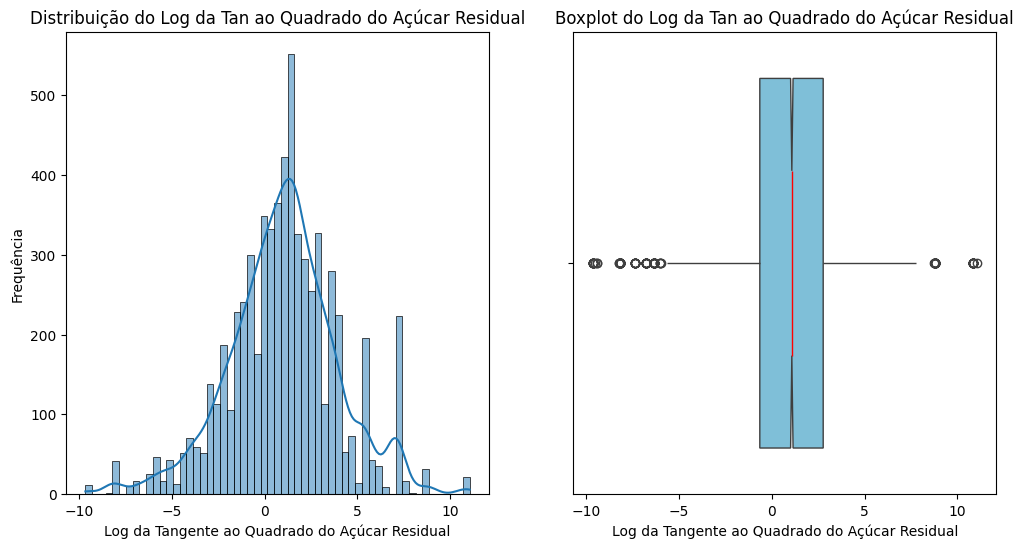

In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x_trans['residual sugar trans'], kde=True)
plt.title("Distribuição do Log da Tan ao Quadrado do Açúcar Residual")
plt.xlabel("Log da Tangente ao Quadrado do Açúcar Residual")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x_trans['residual sugar trans'], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot do Log da Tan ao Quadrado do Açúcar Residual")
plt.xlabel("Log da Tangente ao Quadrado do Açúcar Residual")

plt.show()

Como evidenciado pelo histograma e pelo boxplot, a distribuição da nova variável transformada demonstra uma melhoria significativa na simetria, assemelhando-se mais à distribuição normal. Isso facilitará o ajuste do nosso modelo. É importante salientar que os modelos serão ajustados tanto para as variáveis transformadas quanto para as originais. Isso nos permitirá comparar e verificar se há uma melhoria no desempenho dos algoritmos.

### Cloretos

In [ ]:
x["chlorides"].describe()

count   6497.0000
mean       0.0560
std        0.0350
min        0.0090
25%        0.0380
50%        0.0470
75%        0.0650
max        0.6110
Name: chlorides, dtype: float64

In [ ]:
l = x[x['chlorides'] <=0.065]

In [ ]:
x["chlorides"].mode()

0   0.0440
Name: chlorides, dtype: float64

A análise dos níveis de cloretos no vinho revela informações importantes sobre a distribuição da variável. A média de 0.056 indica que, em média, os vinhos possuem essa quantidade de cloretos. O desvio padrão de 0.0350 demonstra a dispersão dos dados em torno da média, com a maioria dos vinhos se concentrando no intervalo entre 0.021 e 0.091.

A análise da mediana (0.0470) e da moda (0.044), ambas abaixo da média, evidencia uma assimetria positiva na distribuição dos dados. Isso significa que a cauda da distribuição se estende mais para valores altos de cloretos do que para valores baixos. A observação de que o segundo quartil está mais próximo do primeiro quartil do que do terceiro quartil corrobora essa conclusão.

Podemos verificar que existe um valor máximo bem distante do terceiro quartil, podendo ser ele o possível causador da assimetria nos dados.

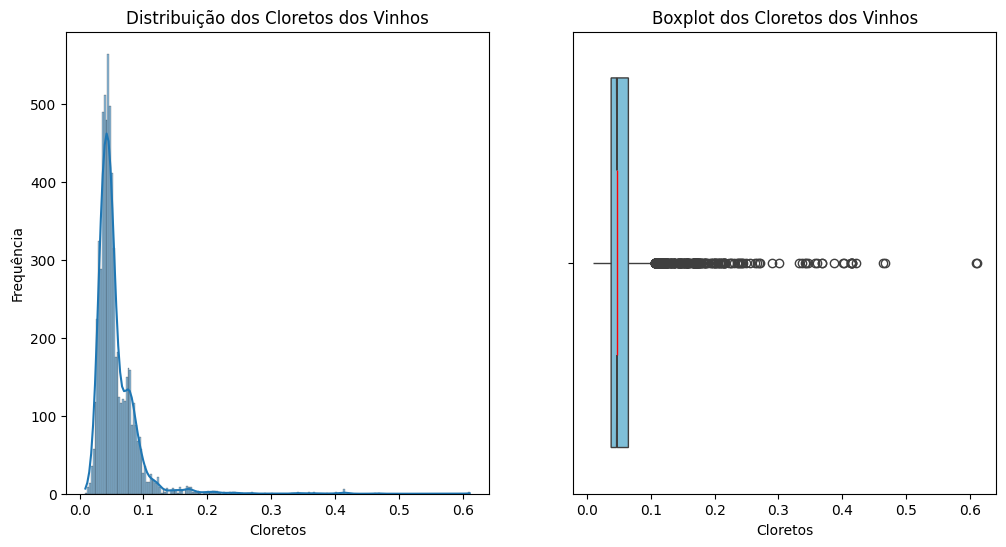

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["chlorides"], kde=True)
plt.title("Distribuição dos Cloretos dos Vinhos")
plt.xlabel("Cloretos")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x["chlorides"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot dos Cloretos dos Vinhos")
plt.xlabel("Cloretos")

plt.show()

Ao verificar o histograma e o boxplot, observamos que há muitas observações dispersas após o valor de 0,071 de cloreto, causando uma assimetria positiva. Vamos aplicar algumas transformações para tentar diminuir a dispersão das observações que estão além do 3º quartil.

#### Transformação do Modolo do Logarítimica

Para diminuir a assimetria positiva da variável de cloreto, vamos aplicar a transformação logarítmica e depois aplicar o modulo nessa variável. Ao aplicar a transformação do modulo logarítmico, esperamos que a distribuição da variável 'chlorides' se torne mais simétrica, reduzindo a dispersão das observações que estão além do 3º quartil.



In [ ]:
x_trans["log chlorides"] = (np.log(x["chlorides"]) * -1)
x_trans = x_trans.drop(columns=['chlorides'])

In [ ]:
x_trans["log chlorides"] .describe()

count   6497.0000
mean       2.9906
std        0.4312
min        0.4927
25%        2.7334
50%        3.0576
75%        3.2702
max        4.7105
Name: log chlorides, dtype: float64

In [ ]:
x_trans["log chlorides"] .mode()

0   3.1236
Name: log chlorides, dtype: float64

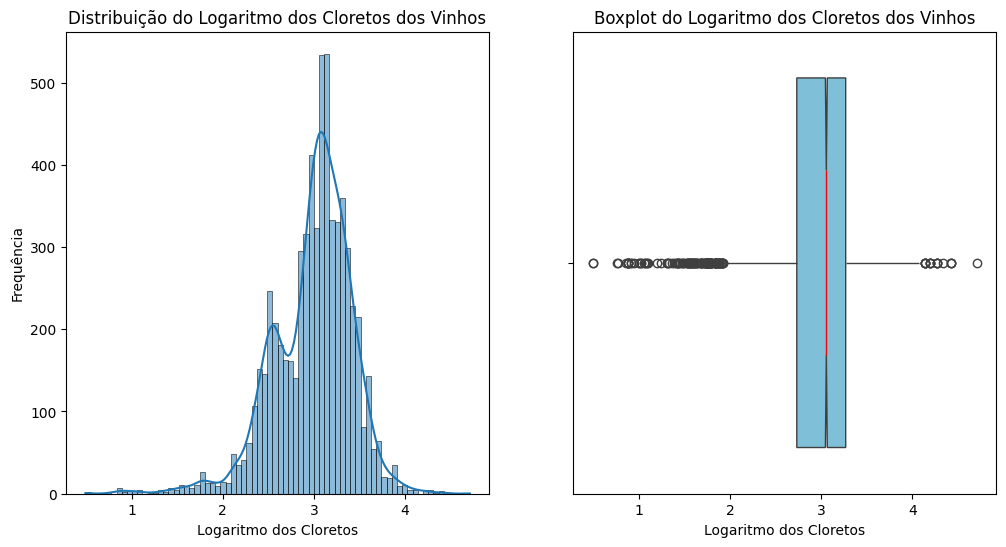

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x_trans["log chlorides"] , kde=True)
plt.title("Distribuição do Logaritmo dos Cloretos dos Vinhos")
plt.xlabel("Logaritmo dos Cloretos")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x_trans["log chlorides"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot do Logaritmo dos Cloretos dos Vinhos")
plt.xlabel("Logaritmo dos Cloretos")
plt.show()

Após verificar os gráficos após a transformação, observamos que a média se aproxima da mediana e da moda. Essa convergência indica uma distribuição mais simétrica, sinalizando um equilíbrio na distribuição dos dados. Além disso, somar e subtrair o desvio padrão da média resulta em valores próximos ao 1º e 3º quartis, respectivamente. Essa relação reforça a observação da simetria, demonstrando que a variabilidade dos dados está distribuída de forma mais uniforme em torno da média.

### Dióxido de Enxofre Livre

In [ ]:
x["free sulfur dioxide"].describe()

count   6497.0000
mean      30.5253
std       17.7494
min        1.0000
25%       17.0000
50%       29.0000
75%       41.0000
max      289.0000
Name: free sulfur dioxide, dtype: float64

In [ ]:
# Moda da variável "free sulfur dioxide"
x["free sulfur dioxide"].mode()

0   29.0000
Name: free sulfur dioxide, dtype: float64

A média da quantidade de dióxido de enxofre livre é de aproximadamente 30,52, com um desvio padrão de 17,75. Isso indica que a maioria dos valores está no intervalo de aproximadamente 12.77 a 48.27.

Além disso, a mediana e a moda são iguais (29), situando-se um pouco abaixo da média. Entretanto, o segundo quartil está mais próximo do primeiro, e há um valor máximo muito acima do terceiro quartil, indicando a existência de uma distribuição assimetricamente positiva.

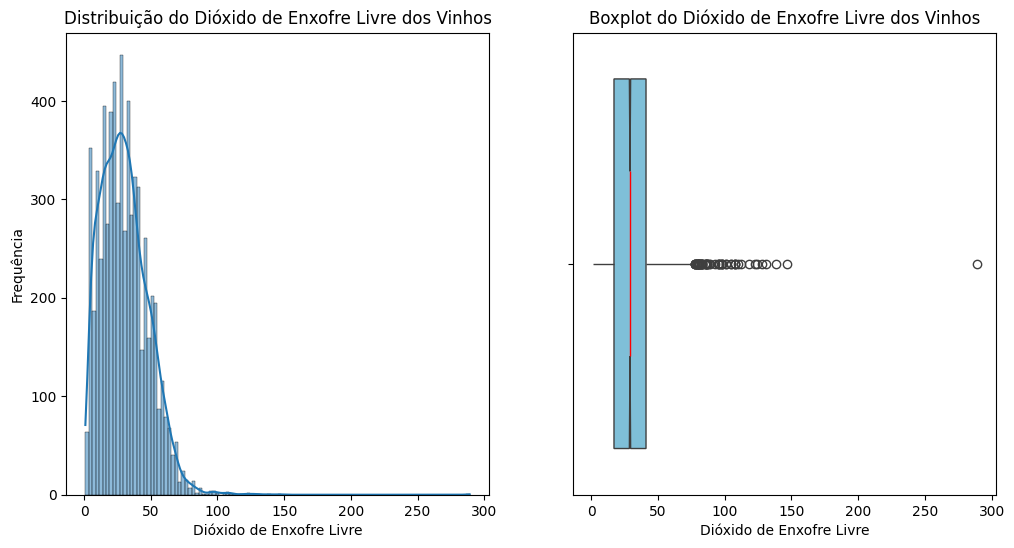

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["free sulfur dioxide"], kde=True)
plt.title("Distribuição do Dióxido de Enxofre Livre dos Vinhos")
plt.xlabel("Dióxido de Enxofre Livre")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x["free sulfur dioxide"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot do Dióxido de Enxofre Livre dos Vinhos")
plt.xlabel("Dióxido de Enxofre Livre")
plt.show()

Ao verificar o gráfico de histograma e boxplot, podemos ver que a afirma de assimetria possitiva é válida. Portanto, vamos propor alguma transformação para tentar diminuir essa assimetria, afim de melhorar a variabilidade dos dados.

Para melhorar a assimetria dos dados, vamos propor criar uma nova variavel, ela vai indicar a proporção de dióxido livre em relação ao total, mas antes disso vamos fazer uma análise da variavel de dióxido de enxofre total.

### Dióxido de Enxofre Total

In [ ]:
x["total sulfur dioxide"].describe()

count   6497.0000
mean     115.7446
std       56.5219
min        6.0000
25%       77.0000
50%      118.0000
75%      156.0000
max      440.0000
Name: total sulfur dioxide, dtype: float64

In [ ]:
x["total sulfur dioxide"].mode()

0   111.0000
Name: total sulfur dioxide, dtype: float64

A média de dióxido de enxofre total é de 115.715, com um desvio padrão de aproximadamente 56.53. Isso significa que a maioria dos vinhos possui entre 59.18 e 172.24 de dióxido de enxofre total.

Podemos observar que o máximo de dióxido de enxofre é de 440 é consideravelmente superior ao terceiro quartil (167) sugere a presença de outliers ou valores extremos que podem estar influenciando a distribuição da variável.

Text(0.5, 0, 'Dióxido de Enxofre Total')

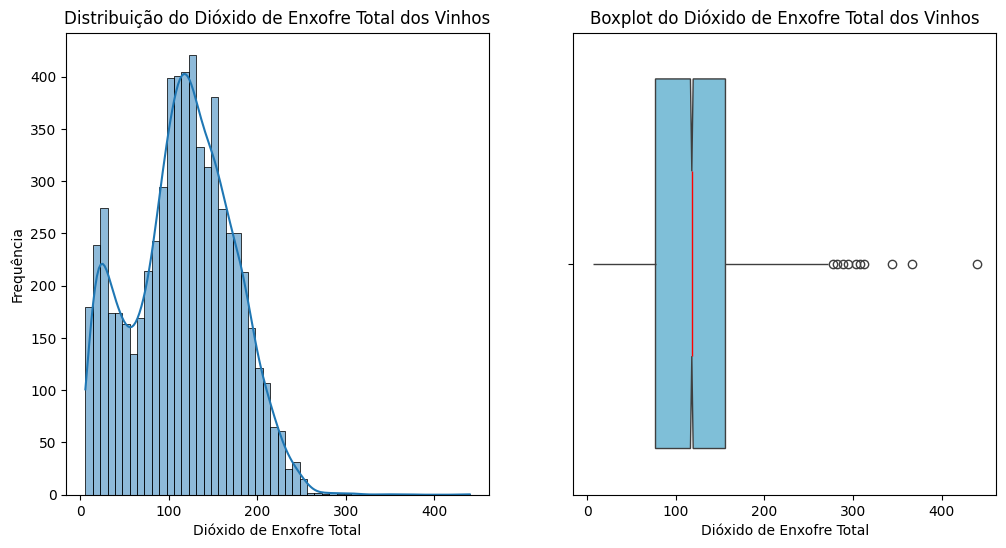

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["total sulfur dioxide"], kde=True)
plt.title("Distribuição do Dióxido de Enxofre Total dos Vinhos")
plt.xlabel("Dióxido de Enxofre Total")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x["total sulfur dioxide"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot do Dióxido de Enxofre Total dos Vinhos")
plt.xlabel("Dióxido de Enxofre Total")

Ao plotar o histograma e o boxplot do dióxido total, observamos a presença de outliers para valores grandes, além de uma assimetria positiva. Como mencionado anteriormente, planejamos combinar a variável de dióxido total com a variável de dióxido livre para aprimorar a qualidade da distribuição dos dados de ambas as variáveis

### Transformação nas  Variáveis de Dióxido de Enxofre Livre e Total

Como vimos acima, as variáveis de dióxido possui alguns anomalias nas suas distribuição, contendo outliers que distorcem a sua distribuição. Afim de melhorar isso, foi proposto uma transformação para criar uma nova variável **(proportional free dioxide)**. Essa transformação consiste na seguinte combinação:

In [ ]:
x_trans["proporcional dioxido"] = np.sqrt(
    x["free sulfur dioxide"] / x["total sulfur dioxide"]
)
x_trans = x_trans.drop(columns=['free sulfur dioxide', 'total sulfur dioxide'])

In [ ]:
x_trans["proporcional dioxido"].describe()

count   6497.0000
mean       0.5230
std        0.1150
min        0.1508
25%        0.4495
50%        0.5194
75%        0.5906
max        0.9258
Name: proporcional dioxido, dtype: float64

In [ ]:
x_trans["proporcional dioxido"].mode()

0   0.5000
Name: proporcional dioxido, dtype: float64

Após a combinação das variáveis, observamos suas novas medidas, com uma nova média de 0.523 e um desvio padrão de 0.115. Isso indica que a maioria dos vinhos tem uma proporção de dióxido livre, após ser submetida à raiz quadrada, entre 0.408 e 0.638.
2.5
Também notamos que o valor mínimo de 0.1508 e o máximo de 0.9258 estão bastante distantes do primeiro quartil (0.4495) e do terceiro quartil (0.5907), respectivamente. Isso sugere que a transformação não foi capaz de lidar completamente com os outliers. No entanto, é importante ressaltar que a média, mediana e moda estão quase exatamente igual a 0.5, indicando um ajuste para uma melhor simetria dos dados.

Text(0.5, 0, 'Proporção de Dióxido de Enxofre ')

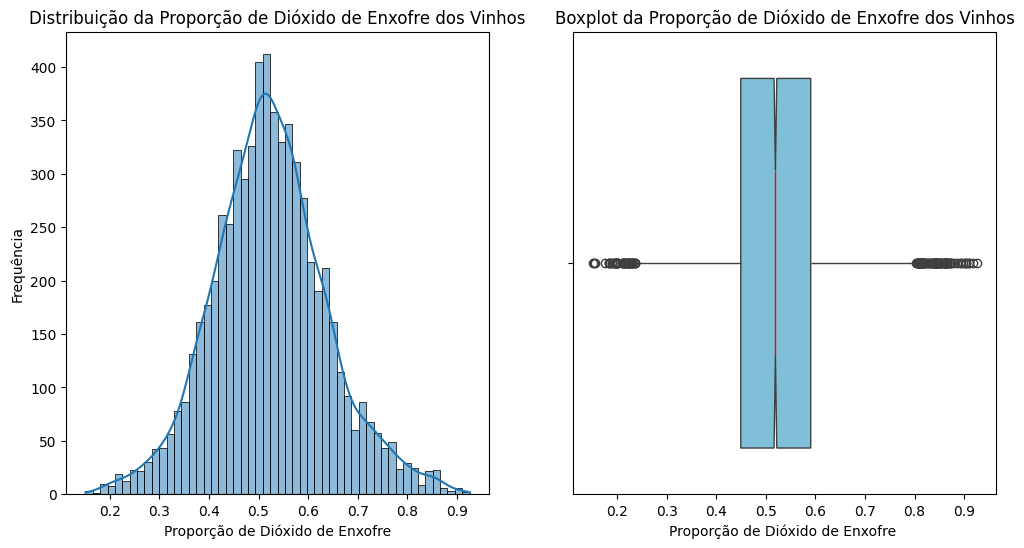

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x_trans["proporcional dioxido"], kde=True)
plt.title("Distribuição da Proporção de Dióxido de Enxofre dos Vinhos")
plt.xlabel("Proporção de Dióxido de Enxofre")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x_trans["proporcional dioxido"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Proporção de Dióxido de Enxofre dos Vinhos")
plt.xlabel("Proporção de Dióxido de Enxofre ")

Podemos verificar tanto no boxplot quanto no histograma, que a afirmação dos outliers e simetria nos dados se concretizam.

### Densidade

In [ ]:
x["density"].describe()

count   6497.0000
mean       0.9947
std        0.0030
min        0.9871
25%        0.9923
50%        0.9949
75%        0.9970
max        1.0390
Name: density, dtype: float64

In [ ]:
x["density"].mode()

0   0.9972
1   0.9976
Name: density, dtype: float64

Ao analisar as estatísticas de densidade, observamos que a média é de 0.9947, com um desvio padrão de 0.003. Isso sugere que a maioria dos vinhos está concentrada no intervalo de 0.9917 e 0.9977.

Além disso, podemos notar que essa variável é bimodal, com modas em 0.9972 e 0.9976. É interessante observar que a média, mediana e moda são bastante próximas, assim como os quartis. No entanto, não podemos afirmar que a distribuição é simétrica devido ao valor máximo de 1.0390, que está 14 desvios padrão acima do terceiro quartil. Essa discrepância indica a presença de valores atípicos ou uma distribuição não simétrica.

Text(0.5, 0, 'Densidade')

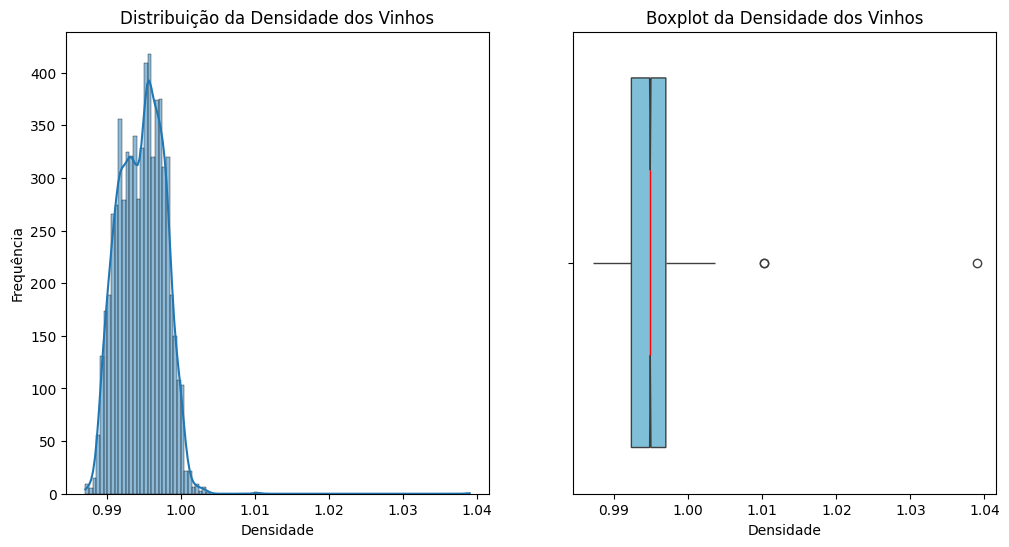

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["density"], kde=True)
plt.title("Distribuição da Densidade dos Vinhos")
plt.xlabel("Densidade")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x["density"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Densidade dos Vinhos")
plt.xlabel("Densidade")

Diversas transformações foram avaliadas para reduzir o impacto dos outliers, mas nenhuma foi bem-sucedida. No entanto, como desejamos utilizar todos os dados disponíveis, adotaremos duas abordagens:

  1. Incluir essa observação nos dados de treinamento.
  2. Incluir essa observação nos dados de teste.
  
Em seguida, avaliaremos o impacto dessa observação nos resultados dos modelos.

### pH

In [ ]:
x['pH'].describe()

count   6497.0000
mean       3.2185
std        0.1608
min        2.7200
25%        3.1100
50%        3.2100
75%        3.3200
max        4.0100
Name: pH, dtype: float64

In [ ]:
x['pH'].mode()

0   3.1600
Name: pH, dtype: float64

Ao examinar as medidas da variável de pH presentes nos vinhos brancos e vermelhos, observamos que sua média é aproximadamente 3.2185, com um desvio padrão de 0.1608. Consequentemente, a maioria dos vinhos está dentro do intervalo de 3.0577 a 3.3793, variando de um mínimo de 2.72 a um máximo de 4.01.

Além disso, podemos observar que os três quartis estão próximos uns dos outros, assim como a moda de 3.16 e a média, sugerindo uma possível simetria nos dados. No entanto, o valor mínimo (2.72) está 2.42 vezes o desvio padrão abaixo do primeiro quartil, e o valor máximo (4.01) está aproximadamente 4.39 vezes o desvio padrão acima do terceiro quartil, indicando a possível presença de outliers em ambas as extremidades.

Para confirmar se os dados apresentam ou não uma simetria, é necessário examinar tanto o histograma quanto o boxplot.

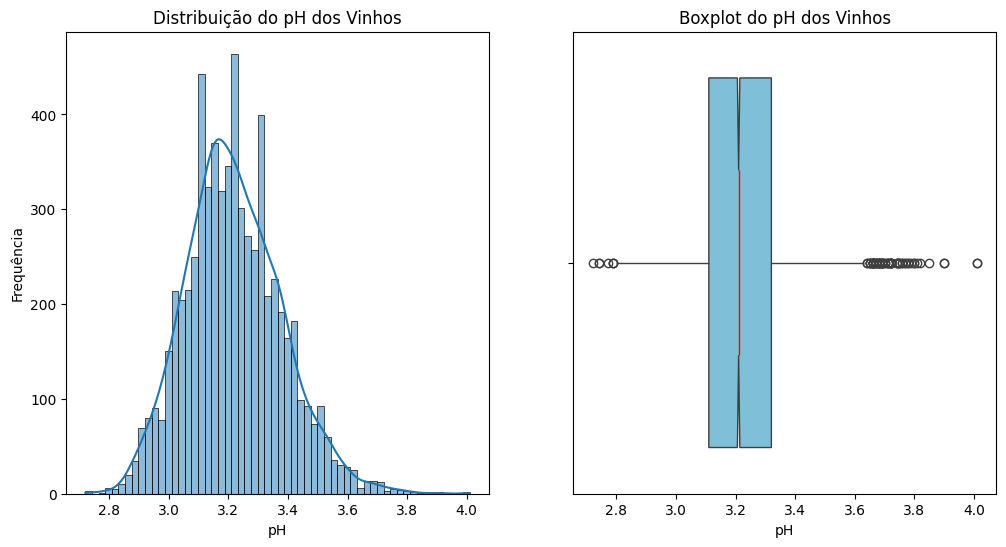

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["pH"], kde=True)
plt.title("Distribuição do pH dos Vinhos")
plt.xlabel("pH")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x["pH"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot do pH dos Vinhos")
plt.xlabel("pH")
plt.show()

Podemos observar tanto no gráfico de histograma quanto no de boxplot que as afirmações sobre a simetria e os outliers se confirmam.

### Sulfatos

In [ ]:
x['sulphates'].describe()

count   6497.0000
mean       0.5313
std        0.1488
min        0.2200
25%        0.4300
50%        0.5100
75%        0.6000
max        2.0000
Name: sulphates, dtype: float64

In [ ]:
x['sulphates'].mode()

0   0.5000
Name: sulphates, dtype: float64

Ao verificar as medidas da variável que indica a quantidade de sulfato presente nos vinhos, podemos observar que a média é de 0.5313, com um desvio padrão de 0.1488. Isso indica que a maioria dos vinhos está no intervalo de 0.3825 a 0.6801. Além disso, podemos dizer que todos os vinhos possuem entre 0.22 e 2.00 de sulfato, sendo esses os valores mínimo e máximo, respectivamente.

As informações mostram que a média, mediana (0.5100) e moda (0.5000) estão bem próximas, mas dispostas em ordem decrescente. Isso sugere uma possível assimetria positiva, uma afirmação que se torna mais evidente ao analisarmos também a distância entre o valor máximo e o terceiro quartil (0.6000).

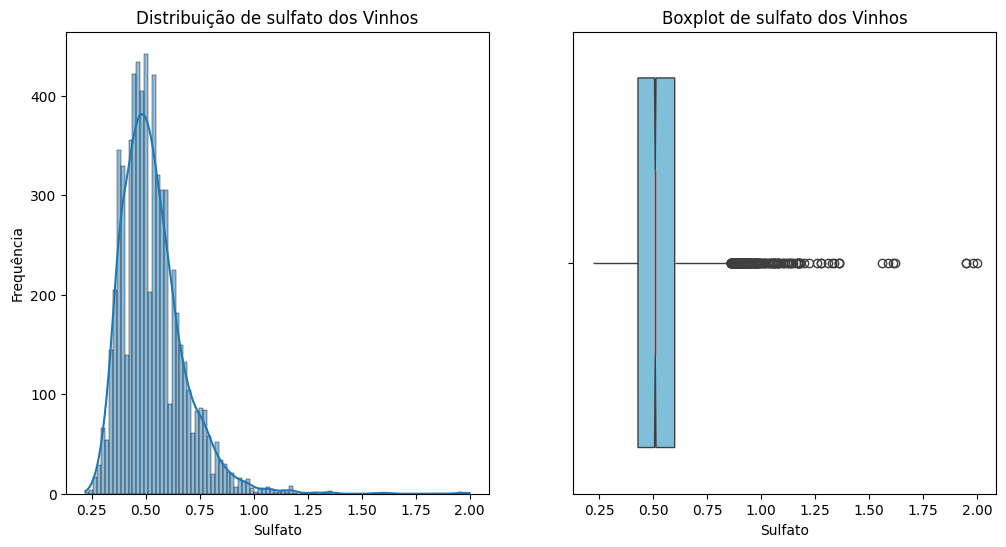

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["sulphates"], kde=True)
plt.title("Distribuição de sulfato dos Vinhos")
plt.xlabel("Sulfato")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x["sulphates"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot de sulfato dos Vinhos")
plt.xlabel("Sulfato")
plt.show()

Dado o histograma e boxplot, podemos verificar que as afirmações sobre a assimetria e outliers é valida. Para melhorar a qualidade dos dados, vamos propor uma transformação nessa variável.

#### Transformação Módulo do Logaritmo Natural de Sulfato

Para melhorar a assimetria e tratar os outliers dos dados de **Sultato**, vamos propor a transformação utilizando o valor absoluto do logaritmo natural do sulfato presente nos vinhos.

In [ ]:
x_trans['log sulphates'] = np.sqrt(np.log(x["sulphates"]) ** 2)
x_trans = x_trans.drop(columns=['sulphates'])

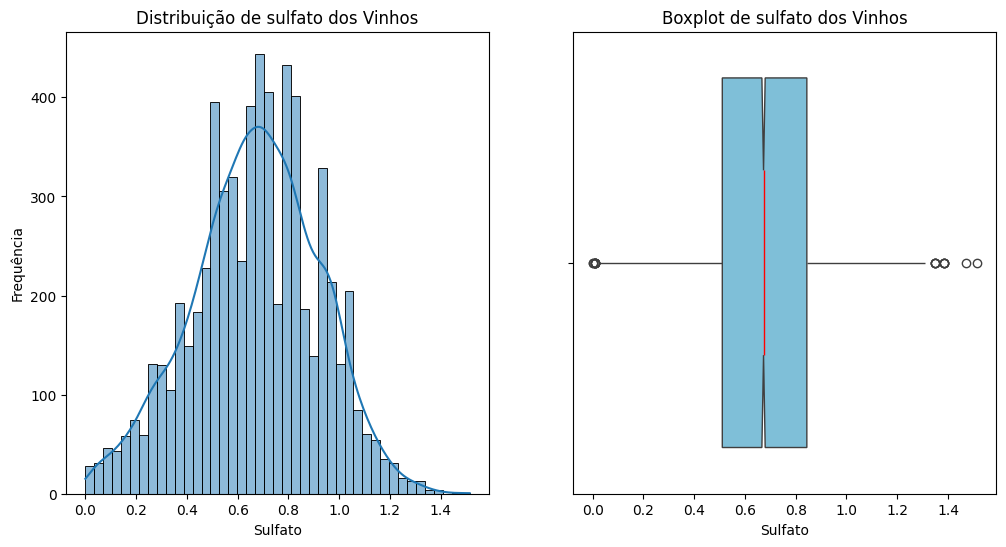

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x_trans['log sulphates'], kde=True)
plt.title("Distribuição de sulfato dos Vinhos")
plt.xlabel("Sulfato")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x_trans['log sulphates'], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot de sulfato dos Vinhos")
plt.xlabel("Sulfato")
plt.show()

Como podemos verificar no histograma e no boxplot, essa transformação trouxe uma melhora significativa tanto no ajuste da assimetria quanto na redução de outliers.

### Álcool

In [ ]:
x['alcohol'].describe()

count   6497.0000
mean      10.4918
std        1.1927
min        8.0000
25%        9.5000
50%       10.3000
75%       11.3000
max       14.9000
Name: alcohol, dtype: float64

In [ ]:
x['alcohol'].mode()

0   9.5000
Name: alcohol, dtype: float64

Analisando as estatísticas do teor alcoólico dos vinhos, podemos verificar que ele possui uma média de 10.492, com um desvio padrão de aproximadamente 1.193. Isso indica que a maioria dos vinhos está no intervalo de 9.3 a 11.68.

Também podemos observar que a moda (9.5) é igual ao primeiro quartil, mas menor que a mediana (10.3) e a média. Isso sugere uma possível assimetria positiva nos dados.

Além da possível assimetria, podemos verificar que o valor máximo (14.9) está muito distante do terceiro quartil (11.3), indicando a presença de possíveis outliers a direita nessa variável.

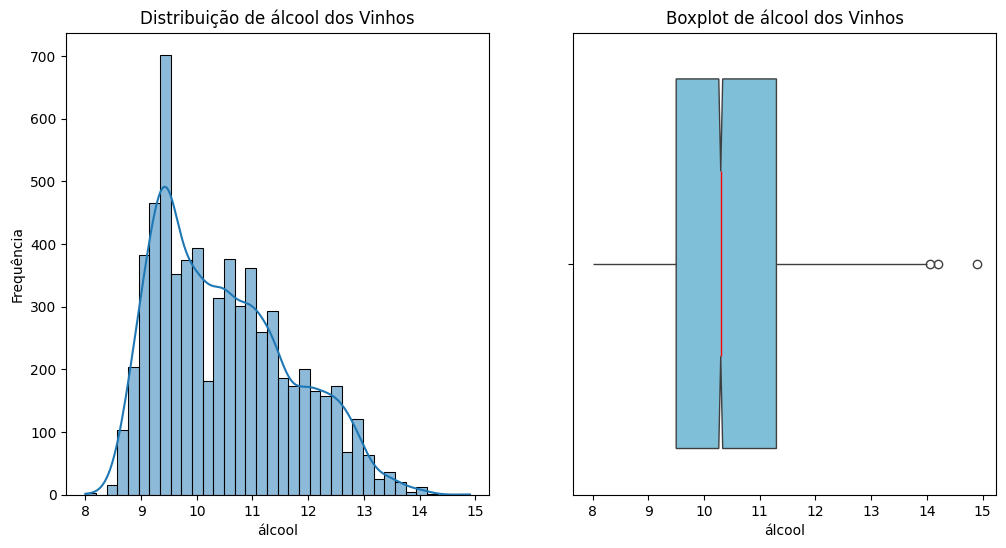

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x['alcohol'], kde=True)
plt.title("Distribuição de álcool dos Vinhos")
plt.xlabel("álcool")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x['alcohol'], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot de álcool dos Vinhos")
plt.xlabel("álcool")
plt.show()

Como mencionado anteriormente, podemos observar a assimetria positiva e a presença de outliers à direita da variável álcool. Com o objetivo de melhorar esses aspectos, vamos propor uma transformação nessa variável.

#### Transformação Box-Cox

Como mencionado anteriormente, vamos realizar a transformação Box-Cox para reduzir os outliers e tentar tornar os dados mais simétricos. A transformação Box-Cox é uma técnica que nos permite estabilizar a variância e aproximar os dados de uma distribuição normal. Essa transformação é especialmente útil para dados que apresentam uma distribuição assimétrica ou com outliers.

Vamos aplicar a transformação Box-Cox à variável de teor alcoólico **(alcohol)** dos vinhos

In [ ]:
x_trans['boxcox alcohol'], fitted_lambda = boxcox(x['alcohol'])
x_trans = x_trans.drop(columns=['alcohol'])

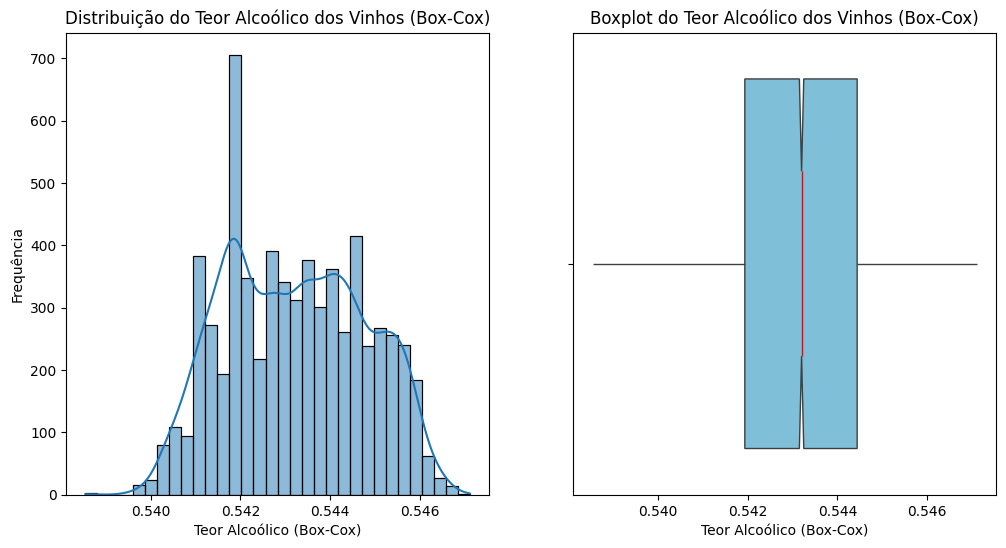

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x_trans['boxcox alcohol'], kde=True)
plt.title("Distribuição do Teor Alcoólico dos Vinhos (Box-Cox)")
plt.xlabel("Teor Alcoólico (Box-Cox)")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(x_trans['boxcox alcohol'], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot do Teor Alcoólico dos Vinhos (Box-Cox)")
plt.xlabel("Teor Alcoólico (Box-Cox)")
plt.show()

Como podemos ver no gráfico de histograma e no boxplot, houve uma melhora significativa na simetria dos dados e na remoção dos outliers. Os três possíveis outliers que estavam presentes no boxplot original foram removidos, resultando em uma distribuição mais homogênea e estável.

### Cor

A variável **(Color)** é do tipo categórica, indicando a cor do vinho, 1 sendo vinho da cor vermelha e 0 para vinhos da cor branca. Para verificar essa variável, vamos estar analisando a quantidade da frequência de cada classe.

In [ ]:
color_counts = x['color'].value_counts().sort_index()

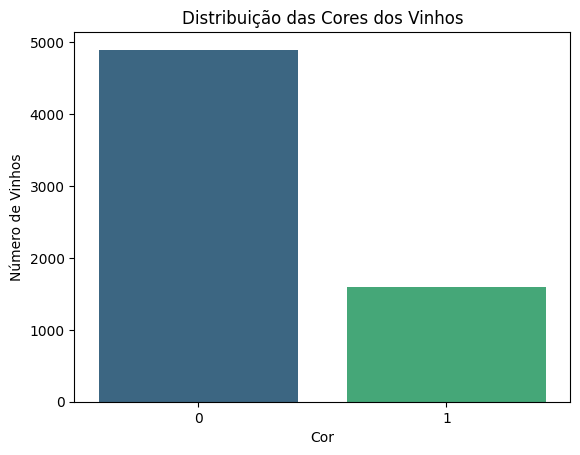

In [ ]:
sns.barplot(x=color_counts .index, y=color_counts .values, palette='viridis')
plt.title('Distribuição das Cores dos Vinhos')
plt.xlabel('Cor')
plt.ylabel('Número de Vinhos')
plt.show()

In [ ]:
print(f'Branco: {color_counts[0]}')
print(f'Vermelho: {color_counts[1]}')
print(f'Total: {sum(color_counts)}')

Branco: 4898
Vermelho: 1599
Total: 6497


Para lidar com o desequilíbrio na distribuição das observações entre vinhos brancos e vinhos vermelhos, você pode considerar usar uma estratégia de validação cruzada estratificada. Isso garantirá que a proporção de vinhos brancos e vermelhos seja mantida em cada fold da validação cruzada estratificada, ajudando a evitar problemas de viés nos conjuntos de treino e teste.

## Variável Resposta


### Qualidade

A variável que faz a classificação da qualidade (notas) dos vinhos, vai ser a nossa variável resposta. As notas vão de 0 a 10

Como essa variável é classificatoria, vamos fazer algo semelhante a análise de cor.

In [ ]:
quality_counts = y.value_counts().sort_index()

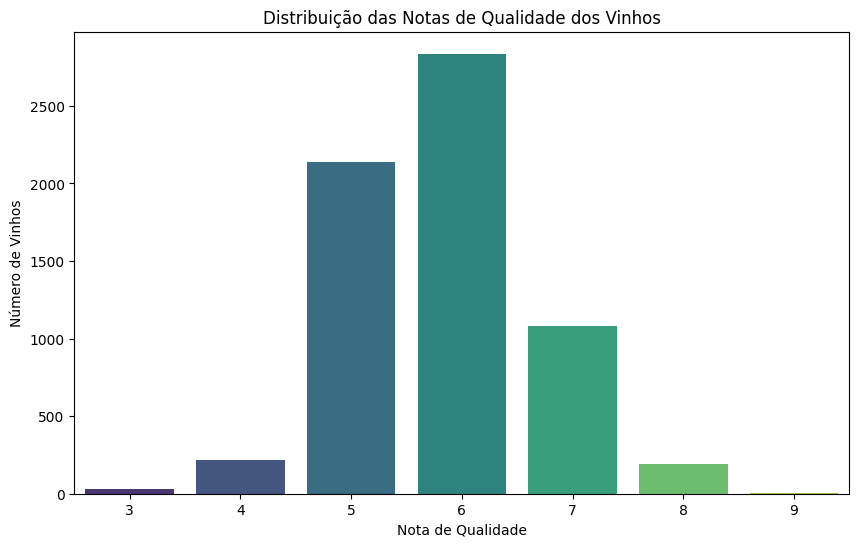

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=quality_counts.index, y=quality_counts.values, palette='viridis')
plt.title('Distribuição das Notas de Qualidade dos Vinhos')
plt.xlabel('Nota de Qualidade')
plt.ylabel('Número de Vinhos')
plt.show()

In [ ]:
print(f'3: {quality_counts.iloc[0]}')
print(f'4: {quality_counts.iloc[1]}')
print(f'5: {quality_counts.iloc[2]}')
print(f'6: {quality_counts.iloc[3]}')
print(f'7: {quality_counts.iloc[4]}')
print(f'8: {quality_counts.iloc[5]}')
print(f'9: {quality_counts.iloc[6]}')
print(f'total: {sum(quality_counts)}')

3: 30
4: 216
5: 2138
6: 2836
7: 1079
8: 193
9: 5
total: 6497


In [ ]:
(sum(quality_counts.iloc[2:5]))/sum(quality_counts)

0.9316607665076189

Ao analisar a frequência das notas de qualidade dos vinhos, observamos que 93.16% deles têm notas entre 5 e 7, indicando um desequilíbrio entre as classes. Para lidar com essa questão, podemos propor uma abordagem semelhante à utilizada para a variável de cor.

## Correlação Entre as Variáveis

A análise de correlação é crucial para a construção de modelos preditivos eficientes. É essencial que as variáveis explicativas, ou seja, as variáveis que utilizaremos para fazer previsões, tenham uma correlação significativa com a variável resposta, que é o resultado que queremos prever **(nota)**.

Entretanto, devemos estar atentos para a presença de multicolinearidade, ou seja, quando as variáveis explicativas estão altamente correlacionadas entre si. Isso pode causar problemas como:

  * Overfitting: O modelo pode se tornar muito específico para os dados de treinamento e não generalizar bem para novos dados.

  * Instabilidade na estimativa dos parâmetros: Os coeficientes do modelo podem se tornar instáveis e difíceis de interpretar.


In [ ]:
x_y = pd.concat([x, y], axis=1)
xtrans_y = pd.concat([x_trans, y], axis=1)

### Gráfico de Dispersão Variáveis Explicativas

Primeiramente, vamos verificar o gráfico de dispersão entre as variáveis explicativas para identificar se elas possuem uma correlação linear ou não. Isso nos ajudará a definir se usaremos a correlação de Pearson ou de Spearman para a análise subsequente.

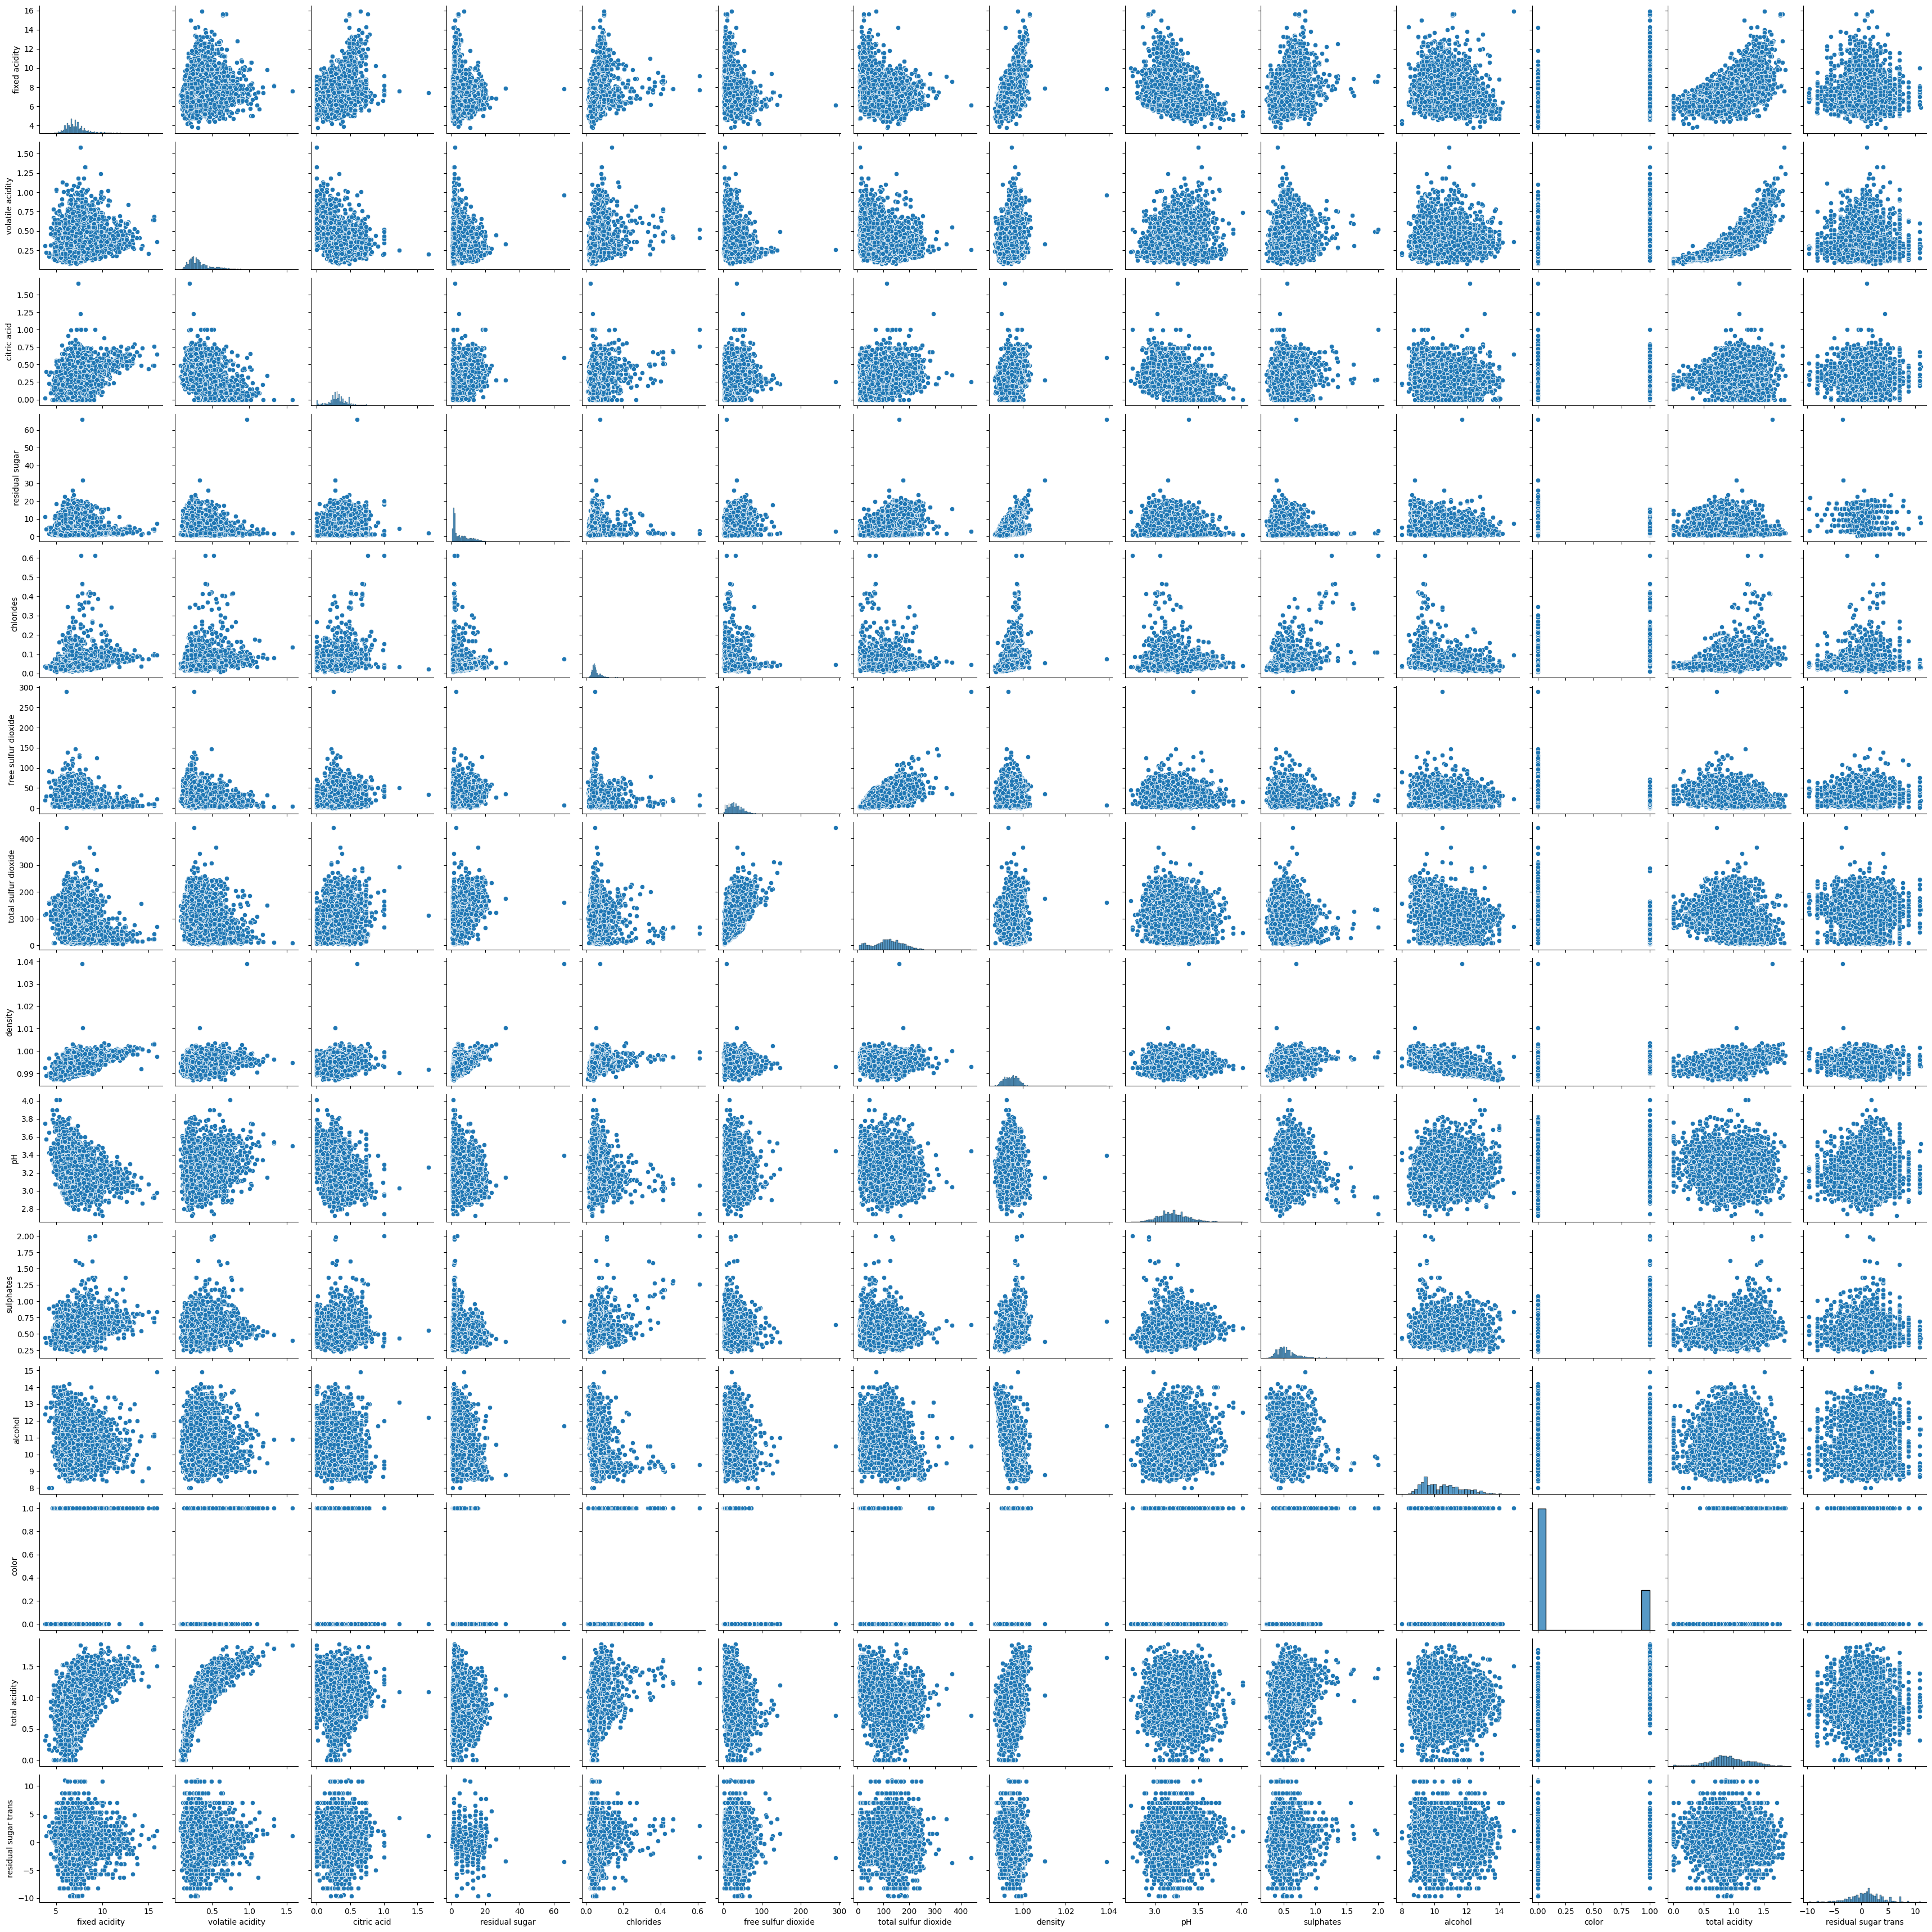

In [ ]:
sns.pairplot(x)
plt.xlabel('Variáveis X')
plt.ylabel('Variáveis X')
plt.show()

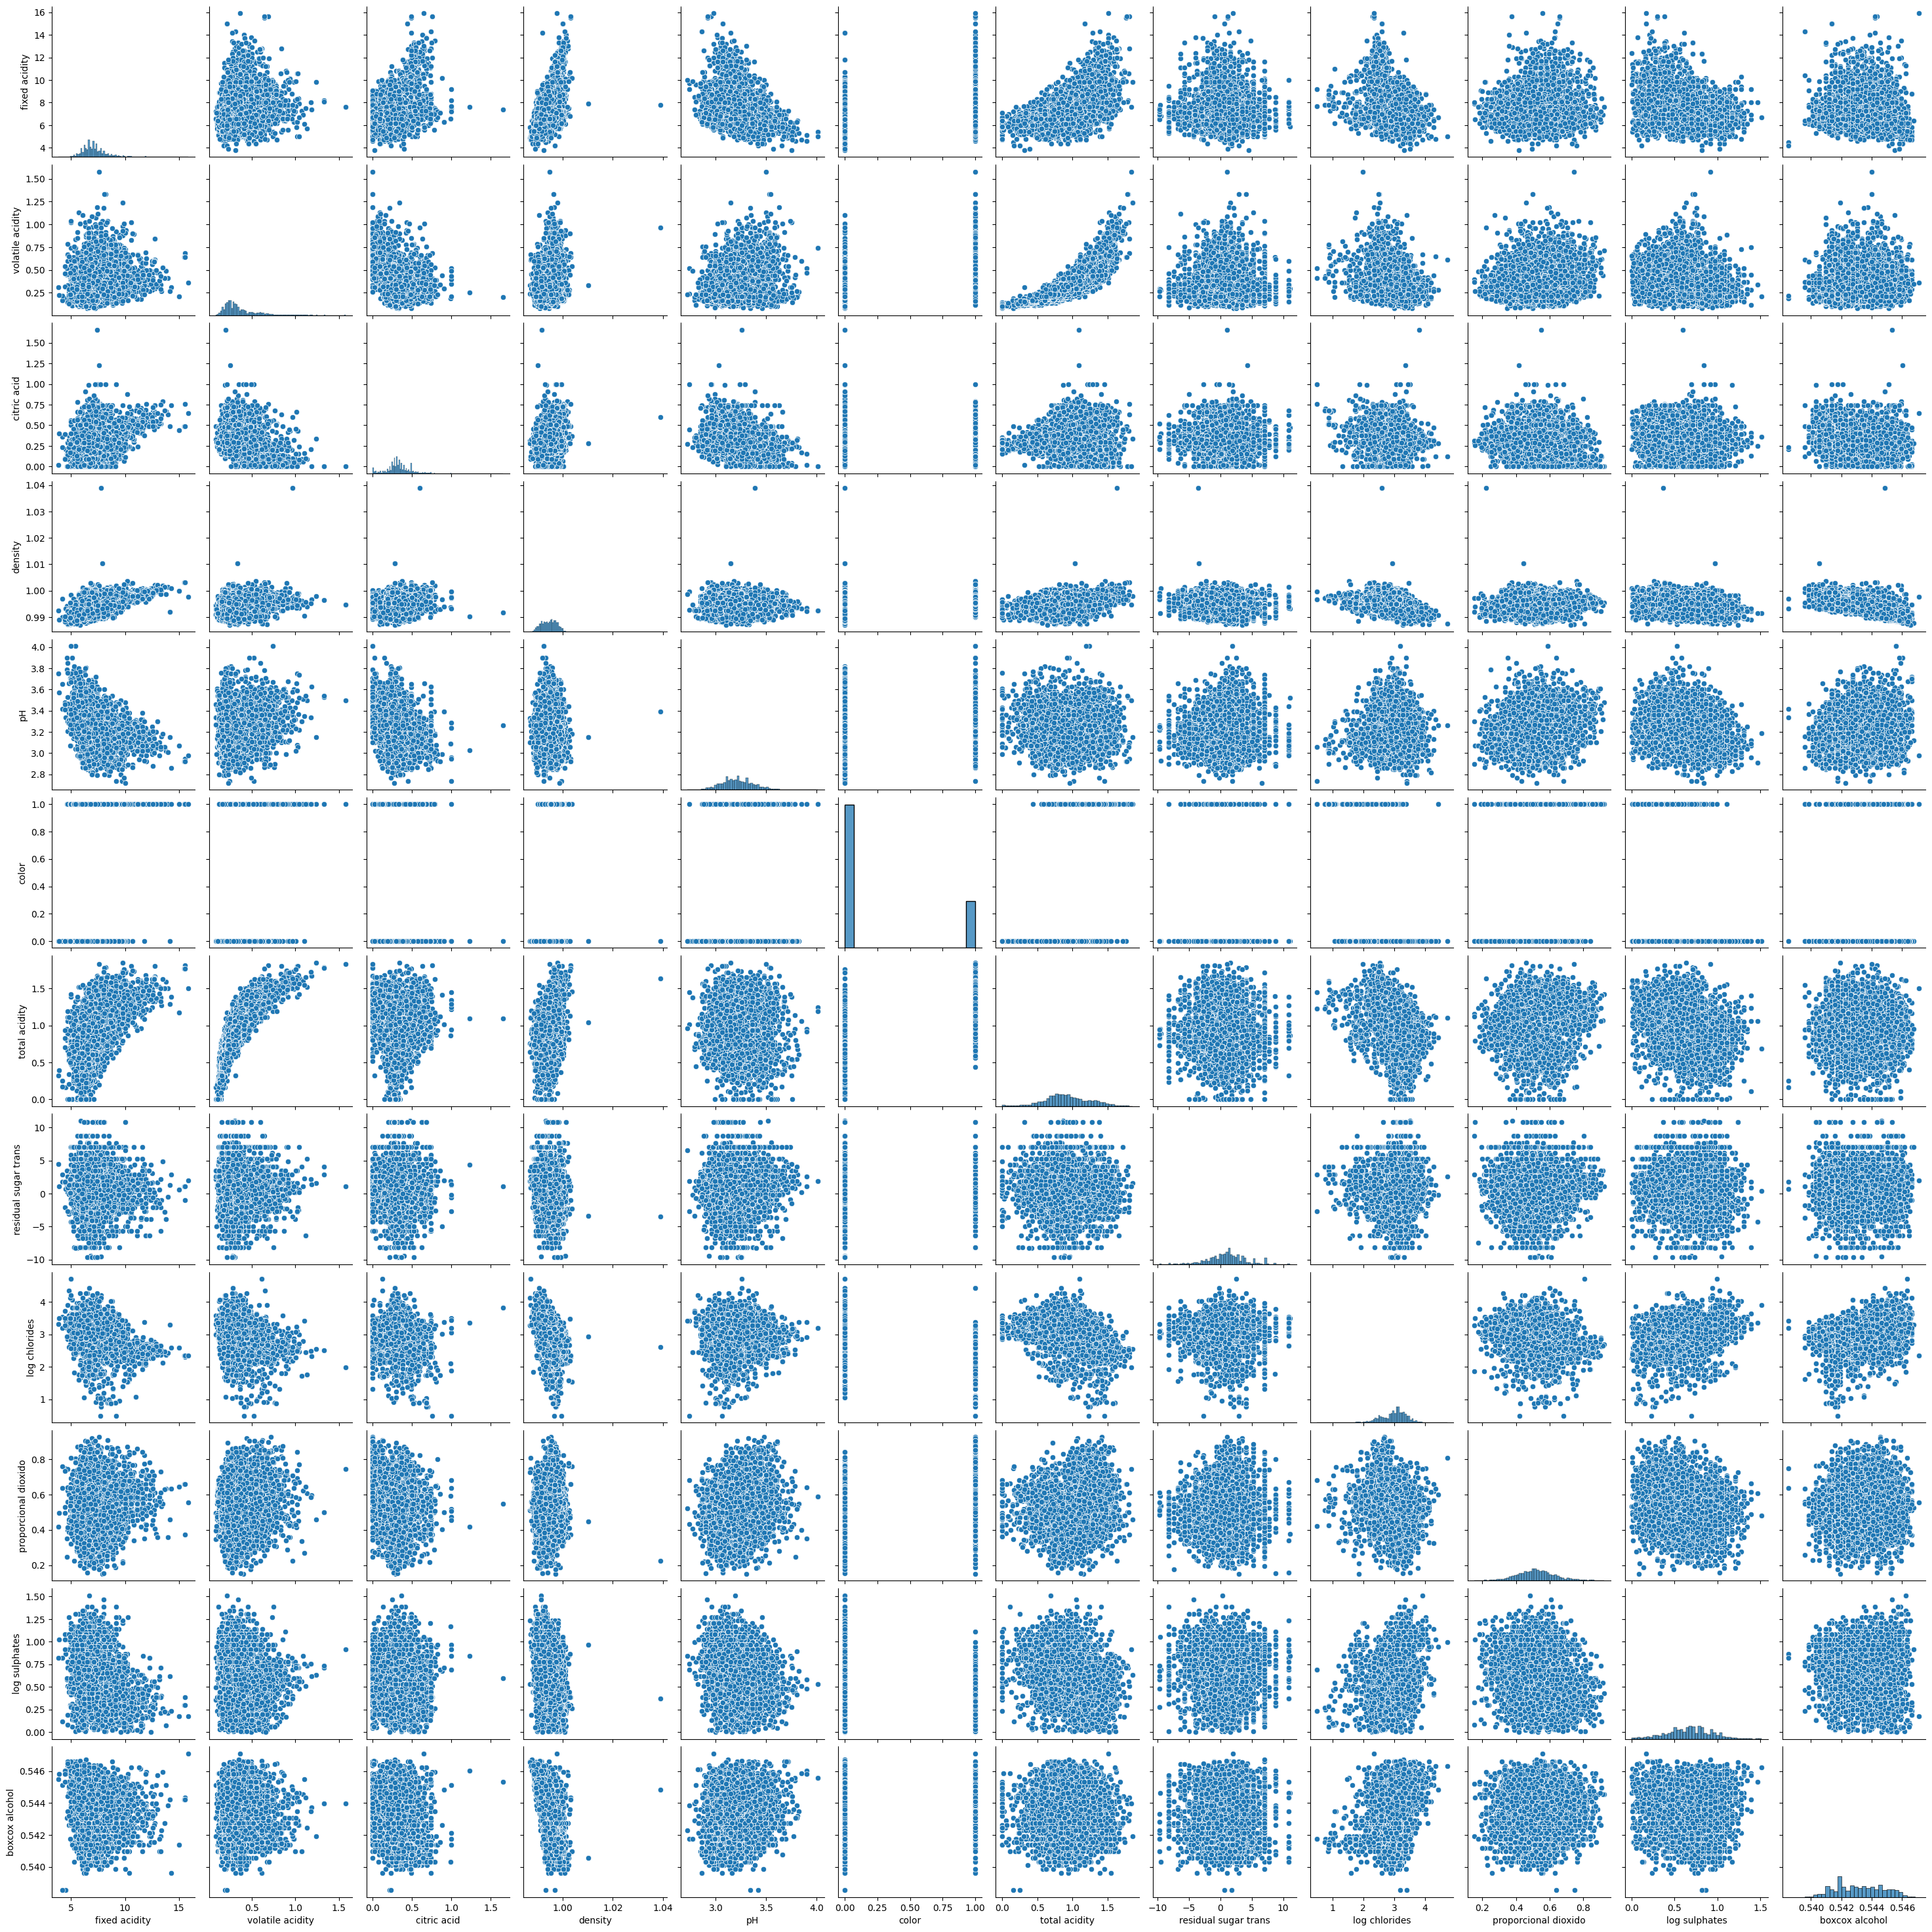

In [ ]:
sns.pairplot(x_trans)
plt.xlabel('Variáveis X')
plt.ylabel('Variáveis X')
plt.show()

Podemos verificar que, tanto para as variáveis transformadas quanto para as variáveis normais, muitas apresentam uma aleatoriedade na sua dispersão. Dito isso, vamos utilizar a correlação de Spearman, que não parte do pressuposto de que as variáveis têm uma relação linear.

### Correlação de Spearman

In [ ]:
x_y.corr(method='spearman')

fixed acidity  volatile acidity  citric acid  \
fixed acidity                1.0000            0.2003       0.2706   
volatile acidity             0.2003            1.0000      -0.2951   
citric acid                  0.2706           -0.2951       1.0000   
residual sugar              -0.0323           -0.0644       0.0749   
chlorides                    0.3560            0.4159      -0.0741   
free sulfur dioxide         -0.2599           -0.3657       0.1221   
total sulfur dioxide        -0.2333           -0.3435       0.1594   
density                      0.4341            0.2614       0.0657   
pH                          -0.2500            0.1949      -0.2859   
sulphates                    0.2201            0.2550       0.0369   
alcohol                     -0.1107           -0.0239       0.0197   
color                        0.4237            0.5991      -0.1612   
total acidity                0.5079            0.9229      -0.0605   
residual sugar trans        -0.0428           -0.0766      -0.0191   
quality                     -0.0982           -0.2578       0.1057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity                -0.0323     0.3560              -0.2599   
volatile acidity             -0.0644     0.4159              -0.3657   
citric acid                   0.0749    -0.0741               0.1221   
residual sugar                1.0000    -0.0358               0.3877   
chlorides                    -0.0358     1.0000              -0.2604   
free sulfur dioxide           0.3877    -0.2604               1.0000   
total sulfur dioxide          0.4549    -0.2684               0.7414   
density                       0.5267     0.5907               0.0058   
pH                           -0.2293     0.1635              -0.1647   
sulphates                    -0.1382     0.3704              -0.2211   
alcohol                      -0.3292    -0.4013              -0.1860   
color                        -0.2565     0.6653              -0.5201   
total acidity                -0.0630     0.4839              -0.4029   
residual sugar trans         -0.3992    -0.0539              -0.0485   
quality                      -0.0169    -0.2951               0.0869   

                      total sulfur dioxide  density      pH  sulphates  \
fixed acidity                      -0.2333   0.4341 -0.2500     0.2201   
volatile acidity                   -0.3435   0.2614  0.1949     0.2550   
citric acid                         0.1594   0.0657 -0.2859     0.0369   
residual sugar                      0.4549   0.5267 -0.2293    -0.1382   
chlorides                          -0.2684   0.5907  0.1635     0.3704   
free sulfur dioxide                 0.7414   0.0058 -0.1647    -0.2211   
total sulfur dioxide                1.0000   0.0615 -0.2427    -0.2567   
density                             0.0615   1.0000  0.0118     0.2748   
pH                                 -0.2427   0.0118  1.0000     0.2543   
sulphates                          -0.2567   0.2748  0.2543     1.0000   
alcohol                            -0.3090  -0.6994  0.1402     0.0046   
color                              -0.6762   0.4084  0.3365     0.4944   
total acidity                      -0.3744   0.3802  0.0671     0.3068   
residual sugar trans               -0.0563  -0.2028  0.0731     0.0155   
quality                            -0.0548  -0.3228  0.0325     0.0298   

                      alcohol   color  total acidity  residual sugar trans  \
fixed acidity         -0.1107  0.4237         0.5079               -0.0428   
volatile acidity      -0.0239  0.5991         0.9229               -0.0766   
citric acid            0.0197 -0.1612        -0.0605               -0.0191   
residual sugar        -0.3292 -0.2565        -0.0630               -0.3992   
chlorides             -0.4013  0.6653         0.4839               -0.0539   
free sulfur dioxide   -0.1860 -0.5201        -0.4029               -0.0485   
total sulfur diox

Podemos verificar que nenhuma das variáveis possui uma alta correlação de Spearman com a variável "quality", indicando que as variáveis não possuem uma relação linear forte com a qualidade. Por conta disso, os modelos de machine learning terão um grande papel em identificar relações não lineares dessas variáveis.


# Agrupamento das Classes de Qualidade de Vinho

Para aprimorar o ajuste do modelo, propomos uma nova estrutura de classes, dividindo os vinhos em categorias de acordo com suas notas. Agora, em vez de categorizá-los em notas de 0 a 10, agrupamos os vinhos da seguinte forma:

* Notas Baixas: [0, 4] - Classe 0

* Notas Médias: [5, 7] - Classe 1

* Notas Altas: [8, 10] - Classe 2

Essa nova abordagem visa simplificar a previsão da qualidade do vinho, agrupando as notas em categorias que refletem melhor as características de cada faixa de pontuação.






In [ ]:
df['target'] = df["quality"].map({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 1, 8: 2, 9: 2, 10: 2})

In [ ]:
df_trans = x_trans.join(y, how='inner')
df_trans["target"] = df["quality"].map({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 1, 8: 2, 9: 2, 10: 2})

# Árvores de Decisão


### Separação dos dados de Treino e Teste

Para conduzir os experimentos com árvores de decisão, os dados serão divididos aleatoriamente em conjuntos de treinamento e teste. A divisão será feita de forma que 70% dos dados sejam destinados ao treinamento, enquanto os 30% restantes serão reservados para teste.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, f1_score
from sklearn.tree import plot_tree
x = df.drop(["quality", "target"], axis = 1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
class_names = ["Baixa", "Media", "Alta"]


### Experimentos


Aqui inicia-se a preparação para os experimentos. Neste estágio, criamos uma função que treina e testa uma árvore de decisão utilizando os parâmetros fornecidos. A função avalia o desempenho do modelo com base em precisão (precision) e cobertura (recall), retornando esses valores.

In [ ]:
def train_decision_tree(X_train, y_train, X_test, y_test, max_depth, criterion, class_names=None):
    # Criar o classificador de árvore de decisão com os parâmetros fornecidos
    clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth, criterion=criterion)

    # Treinar o classificador
    clf.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = clf.predict(X_test)

    # Avaliar o desempenho do classificador
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calcular precisão (precision)
    precision = precision_score(y_test, y_pred, average='weighted')

    # Calcular cobertura (recall)
    recall = recall_score(y_test, y_pred, average='weighted')

    f1 = f1_score(y_test, y_pred, average='weighted')

    return precision, recall, f1



Durante os experimentos, ajustaremos dois parâmetros principais:

- **Profundidade da Árvore (max_depth):**
  Refere-se ao número máximo de níveis que a árvore pode ter. Árvores muito profundas podem ajustar-se excessivamente aos dados de treinamento, capturando não apenas os padrões relevantes, mas também o ruído, o que resulta em um desempenho pior em dados não vistos. Contudo, árvores muito rasas podem ser incapazes de capturar padrões complexos nos dados, levando a um modelo que não representa bem a relação entre as variáveis.

- **Critério de Divisão (criterion):**
  O critério de divisão determina a função utilizada para medir a qualidade de uma divisão. Os dois critérios mais comuns são:
  - **Gini:** Mede a impureza de um nó, ou seja, a probabilidade de um elemento ser classificado incorretamente se fosse rotulado aleatoriamente de acordo com a distribuição das classes no nó.
  - **Entropy:** Calcula a quantidade de incerteza envolvida na distribuição das classes.

Para o experimento, iremos testar a árvore de decisão com diferentes valores de max_depth (10, 20, 40, 80, 160) e ambos os critérios (gini e entropy). O objetivo é encontrar o ponto em que tanto a precisão (precision) quanto a cobertura (recall) param de crescer e começam a decair.

In [ ]:
max_depth_values = [10, 20, 40, 80, 160]
criterion_values = ['gini', 'entropy']

results = []

for max_depth in max_depth_values:
    for criterion in criterion_values:

        precision, recall, f1 = train_decision_tree(X_train, y_train, X_test, y_test, max_depth, criterion, class_names)

        results.append({'max_depth': max_depth, 'criterion': criterion, 'precision': precision, 'recall': recall, 'f1': f1})

results_df = pd.DataFrame(results)

results_gini_df = results_df[results_df['criterion'] == 'gini']
results_entropy_df = results_df[results_df['criterion'] == 'entropy']

pd.options.display.float_format = '{:.15f}'.format

print("Resultados Experimento:")

print("Resultados para critério 'gini':")
print(results_gini_df)

print("\nResultados para critério 'entropy':")
print(results_entropy_df)

Resultados Experimento:
Resultados para critério 'gini':
   max_depth criterion         precision            recall
0         10      gini 0.887765792628503 0.914871794871795
2         20      gini 0.907900507129264 0.904102564102564
4         40      gini 0.912283383712945 0.901538461538462
6         80      gini 0.912283383712945 0.901538461538462
8        160      gini 0.912283383712945 0.901538461538462

Resultados para critério 'entropy':
   max_depth criterion         precision            recall
1         10   entropy 0.895224456145257 0.914358974358974
3         20   entropy 0.905300312697721 0.896410256410256
5         40   entropy 0.905300312697721 0.896410256410256
7         80   entropy 0.905300312697721 0.896410256410256
9        160   entropy 0.905300312697721 0.896410256410256


### Resultados Experimentos

- **Resultados para critério gini:**
  - **max_depth = 10:** O modelo apresenta uma precisão de 88.78% e um recall de 91.49%.

  - **max_depth = 20:** Observamos uma melhoria na precisão para 90.79%, enquanto o recall permanece praticamente o mesmo em 90.41%.

 - **max_depth = 40, 80, 160:** A precisão se estabiliza em torno de 91.23%, enquanto o recall começa a diminuir, indicando possíveis sinais de overfitting à medida que a árvore se torna mais profunda.

- **Resultados para critério entropy:**
  - **max_depth = 10:** a precisão é de 89.52% e o recall é de 91.44%.

  - **max_depth = 20, 40, 80, 160:** A precisão permanece relativamente estável em torno de 90.53%, independentemente da profundidade máxima da árvore. No entanto, o recall diminui para cerca de 89.64% à medida que a profundidade aumenta.


In [ ]:
max_depth_values = list(range(20, 41))

results = []

criterion = 'gini'

for max_depth in max_depth_values:
        precision, recall = train_decision_tree(X_train, y_train, X_test, y_test, max_depth, criterion, class_names)

        results.append({'max_depth': max_depth, 'criterion': criterion, 'precision': precision, 'recall': recall, 'f1': f1})

results_df = pd.DataFrame(results)

results_gini_df = results_df[results_df['criterion'] == 'gini']

pd.options.display.float_format = '{:.15f}'.format

print("Resultados para critério 'gini':")
print(results_gini_df)


Resultados para critério 'gini':
    max_depth criterion         precision            recall
0          20      gini 0.907900507129264 0.904102564102564
1          21      gini 0.907226842116645 0.901025641025641
2          22      gini 0.912963806300841 0.905641025641026
3          23      gini 0.912283383712945 0.901538461538462
4          24      gini 0.912283383712945 0.901538461538462
5          25      gini 0.912283383712945 0.901538461538462
6          26      gini 0.912283383712945 0.901538461538462
7          27      gini 0.912283383712945 0.901538461538462
8          28      gini 0.912283383712945 0.901538461538462
9          29      gini 0.912283383712945 0.901538461538462
10         30      gini 0.912283383712945 0.901538461538462
11         31      gini 0.912283383712945 0.901538461538462
12         32      gini 0.912283383712945 0.901538461538462
13         33      gini 0.912283383712945 0.901538461538462
14         34      gini 0.912283383712945 0.901538461538462
15     

Para o critério 'gini', realizamos um teste detalhado do intervalo de profundidade da árvore de decisão de 20 a 40 para identificar a profundidade mais otimizada.


In [ ]:
max_depth_values = list(range(1, 21))

results = []

criterion = 'entropy'

for max_depth in max_depth_values:
        precision, recall = train_decision_tree(X_train, y_train, X_test, y_test, max_depth, criterion, class_names)

        results.append({'max_depth': max_depth, 'criterion': criterion, 'precision': precision, 'recall': recall, 'f1': f1})

results_df = pd.DataFrame(results)

results_gini_df = results_df[results_df['criterion'] == 'entropy']

pd.options.display.float_format = '{:.15f}'.format

print("Resultados para critério 'entropy':")
print(results_gini_df)


Resultados para critério 'entropy':
    max_depth criterion         precision            recall
0           1   entropy 0.873026692965154 0.934358974358974
1           2   entropy 0.873026692965154 0.934358974358974
2           3   entropy 0.873026692965154 0.934358974358974
3           4   entropy 0.872963723477071 0.933333333333333
4           5   entropy 0.872900624555301 0.932307692307692
5           6   entropy 0.897048483838068 0.930256410256410
6           7   entropy 0.898136185060871 0.927692307692308
7           8   entropy 0.902512060205992 0.925641025641026
8           9   entropy 0.899387777893648 0.917435897435897
9          10   entropy 0.895224456145257 0.914358974358974
10         11   entropy 0.901786741713571 0.909743589743590
11         12   entropy 0.902094438752837 0.904102564102564
12         13   entropy 0.904153170518451 0.904102564102564
13         14   entropy 0.905600487981440 0.902564102564103
14         15   entropy 0.905892333205766 0.901538461538462
15  

**Resultados Obtidos:**

* Gini:
  - max_depth: 22
  - precision: 91.30%
  - recall: 90.56%

* Entropy:
  - max_depth: 8
  - precision: 90.25%
  - recall: 92.56%

  
*Portanto*, a escolha do critério mais otimizado depende da ênfase dada à precisão e ao recall versus a outros fatores, como simplicidade do modelo.

# Bayesiano Ingênuo


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def train_naive_bayes(X_train, y_train, X_test, y_test):

    clf = GaussianNB()

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)

    precision = precision_score(y_test, y_pred, average='weighted')

    recall = recall_score(y_test, y_pred, average='weighted')

    f1 = f1_score(y_test, y_pred, average='weighted')

    return precision, recall, f1, conf_matrix


## Dados Sem Transformação

 Iniciamos o experimento dividindo os dados em conjuntos de treino e teste.

In [ ]:
# Supondo que 'df' seja o DataFrame com os dados
x = df.drop(["quality", "target"], axis=1)
y = df["target"]

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
class_names = ["Baixa", "Media", "Alta"]

 Definimos uma função que treina um modelo e retorna as métricas para avaliação de seu desempenho. A função foi projetada para fornecer uma análise do comportamento do modelo em termos de precisão, cobertura e F1-Score.

 O Naive Bayes Gaussiano foi escolhido para este experimento devido à sua capacidade de lidar com uma combinação de variáveis contínuas e binárias, como as presentes neste conjunto de dados.

Desempenho do Modelo Bayesiano Ingênuo:
Precisão: 0.8896221665412396
Recall: 0.8087179487179487
F1: 0.8438721403711487


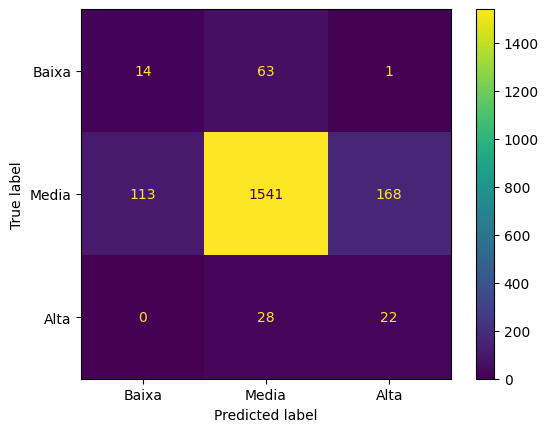

In [ ]:
# Treinar e avaliar o modelo bayesiano ingênuo
precision, recall, f1, conf_matrix = train_naive_bayes(X_train, y_train, X_test, y_test)

# Exibir os resultados
print("Desempenho do Modelo Bayesiano Ingênuo:")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot()


Os resultados do primeiro experimento com o modelo mostram uma precisão de 88,96%, recall de 80,87% e F1-Score de 84,39%.

## Dados Transformados

In [ ]:
# Supondo que 'df' seja o DataFrame com os dados
x = df_trans.drop(["quality", "target"], axis=1)
y = df["target"]

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
class_names = ["Baixa", "Media", "Alta"]

Desempenho do Modelo Bayesiano Ingênuo:
Precisão: 0.8878483185961482
Recall: 0.8307692307692308
F1: 0.8565479597786131


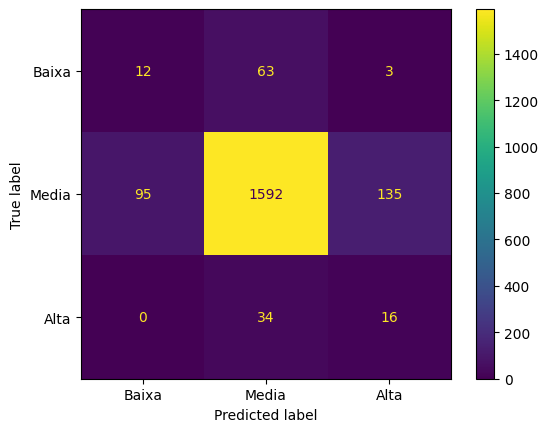

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Treinar e avaliar o modelo bayesiano ingênuo
precision, recall, f1, conf_matrix = train_naive_bayes(X_train, y_train, X_test, y_test)

# Exibir os resultados
print("Desempenho do Modelo Bayesiano Ingênuo:")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot()



As transformações nos dados no segundo experimento resultaram em melhorias significativas nas métricas do modelo. A precisão manteve-se alta, passando de 88,96% para 88,78%, enquanto o recall aumentou de 80,87% para 83,08%, indicando que o modelo identificou mais instâncias positivas. Consequentemente, o F1-Score melhorou de 84,39% para 85,65%, refletindo um melhor equilíbrio entre precisão e recall.

In [ ]:
# Seleção de características
selector = SelectKBest(score_func=f_classif, k=12)  # Selecione as 10 melhores características, ajuste conforme necessário
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Características selecionadas
selected_features = selector.get_support(indices=True)

# Pontuações das características
feature_scores = selector.scores_

# Exibir as características selecionadas e suas pontuações
selected_features_info = pd.DataFrame({
    'Feature': x.columns,
    'Score': feature_scores
}).sort_values(by='Score', ascending=False)

print("\nPontuações das Características:")
print(selected_features_info)


Pontuações das Características:
                 Feature              Score
11        boxcox alcohol 61.522751733446960
1       volatile acidity 55.826718080891446
3                density 37.904134835467417
8          log chlorides 36.948662096650153
6          total acidity 35.804206966088167
9   proporcional dioxido 27.642656282722413
2            citric acid 11.563807785868532
5                  color  8.433361835232640
10         log sulphates  6.963051797336520
0          fixed acidity  6.318981669283763
7   residual sugar trans  1.714127065400429
4                     pH  1.479240950910579


Para o próximo experimento, utilizamos a função SelectKBest com o critério f_classif para mostrar as pontuações de relevância de cada informação nos dados para a predição. Dessa forma, selecionamos as 5 características com maior relevância, com base em sua influência na variável-alvo. Essa abordagem visa simplificar o modelo, focando apenas nas características mais informativas para a predição, o que pode melhorar a precisão

Desempenho do Modelo Bayesiano Ingênuo:
Precisão: 0.8845317775072576
Recall: 0.901025641025641
F1: 0.8922876658701662


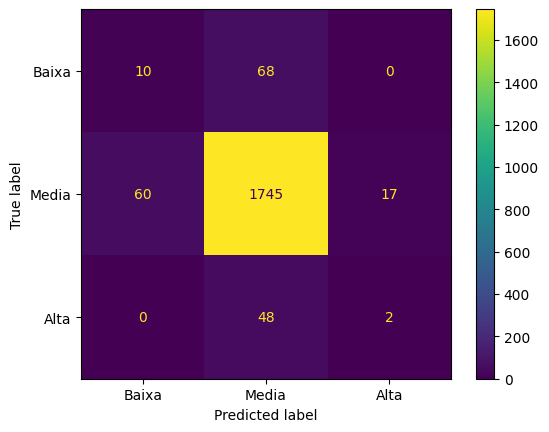

In [ ]:
# Seleção de características
selector = SelectKBest(score_func=f_classif, k=5)  # Selecione as 10 melhores características, ajuste conforme necessário
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Treinar e avaliar o modelo bayesiano ingênuo
precision, recall, f1, conf_matrix = train_naive_bayes(X_train_selected, y_train, X_test_selected, y_test)

# Exibir os resultados
print("Desempenho do Modelo Bayesiano Ingênuo:")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")


# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot()


No resultado final do experimento com o Modelo Bayesiano Ingênuo, obtivemos uma precisão de 88,45%, recall de 90,10% e F1-Score de 89,23%.

# Regressão Logística


### Separação dos dados de treino e teste

Para avaliar o desempenho do modelo de forma confiável, os dados foram divididos em dois conjuntos distintos: um conjunto de treinamento e um conjunto de teste. Esta divisão foi realizada de maneira aleatória, utilizando a função de divisão de dados da biblioteca scikit-learn. O conjunto de treinamento representou 70% dos dados, enquanto o conjunto de teste representou os 30% restantes.

Além disso, para garantir uma avaliação robusta do modelo, empregou-se a técnica de validação cruzada. Esta abordagem divide o conjunto de treinamento em subconjuntos menores, permitindo avaliar o desempenho do modelo em várias iterações. Dessa forma, é possível observar se o modelo proposto apresenta sinais de overfitting (ajuste excessivo aos dados de treinamento) ou underfitting

## Dados Sem Transformação


In [ ]:
df_mod = df.drop(["quality", "target"], axis = 1)
X_lr = df_mod.values
Y_lr = df_trans["target"].to_numpy()

print (f"X = {len(X_lr[1])} features * {len(X_lr)} entries")
print (f"Y = {len(Y_lr)} data entries")

X = 12 features * 6497 entries
Y = 6497 data entries


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_lr, Y_lr, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

# Inicializar o modelo de regressão logística multinomial com class_weight='balanced'
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Realizar a validação cruzada com 5 folds e calcular os scores
scores = cross_val_score(logreg, X_train, y_train, cv=5)

# Calcular a média dos scores
mean_score = scores.mean()
print("Média dos scores da validação cruzada:", mean_score)

# Treinar o modelo nos dados de treinamento
logreg.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = logreg.predict(X_test)

# Calcular a pontuação (score) do modelo nos dados de teste
score = logreg.score(X_test, y_test)
print("Score do modelo nos dados de teste:", score)

# Calcular a métrica F1 nos dados de teste
f1 = f1_score(y_test, y_pred, average='weighted')
print("Métrica F1 do modelo nos dados de teste:", f1)


Média dos scores da validação cruzada: 0.931114237062264
Score do modelo nos dados de teste: 0.9338461538461539
Métrica F1 do modelo nos dados de teste: 0.9019007404687596


Os resultados mostram que o modelo se ajustou bem aos dados. Ele obteve uma precisão notável, alcançando aproximadamente 90,19% de acurácia com base na métrica F1. Além disso, durante a validação cruzada, o modelo manteve um desempenho consistente, com uma média de 93,11% nos diferentes agrupamentos.

In [ ]:
# Obtendo os coeficientes do modelo ajustado
coefficients = logreg.coef_

# Exibindo os coeficientes e os nomes das características
for i, coef in enumerate(coefficients):
    print(f"Coeficientes para a classe {i + 1}:")
    for feature, weight in zip(features, coef):
        print(f"{feature}: {weight:.4f}")
    print()

Coeficientes para a classe 1:
fixed acidity: 0.2706
volatile acidity: 0.1678
citric acid: -0.0494
residual sugar: -0.0500
chlorides: 0.0080
free sulfur dioxide: -0.0418
total sulfur dioxide: 0.0090
density: 0.0175
pH: 0.0567
sulphates: -0.0485
alcohol: -0.2595
color: -0.0622

Coeficientes para a classe 2:
fixed acidity: 0.1721
volatile acidity: -0.0875
citric acid: 0.0291
residual sugar: -0.0011
chlorides: 0.0132
free sulfur dioxide: 0.0115
total sulfur dioxide: 0.0015
density: 0.0693
pH: 0.2443
sulphates: 0.1030
alcohol: -0.0355
color: 0.2448

Coeficientes para a classe 3:
fixed acidity: -0.4427
volatile acidity: -0.0803
citric acid: 0.0202
residual sugar: 0.0511
chlorides: -0.0212
free sulfur dioxide: 0.0302
total sulfur dioxide: -0.0105
density: -0.0868
pH: -0.3010
sulphates: -0.0545
alcohol: 0.2950
color: -0.1825



* Coeficientes para a classe 1 (Vinhos de Baixa Qualidade):

    A presença de álcool (-0.2595) e cor (-0.0622) tem um impacto negativo na probabilidade de pertencer a esta classe. Isso sugere que vinhos com teores alcoólicos mais baixos e cores mais escuras têm uma maior probabilidade de serem classificados como de baixa qualidade.

    Por outro lado, a acidez fixa (0.2706) e a acidez volátil (0.1678) têm um impacto positivo, indicando que vinhos com maiores níveis dessas características têm uma maior probabilidade de serem classificados como de baixa qualidade.


* Coeficientes para a classe 2 (Vinhos de Qualidade Média):

    Nesta classe, a cor (0.2448) e o pH (0.2443) têm o maior impacto positivo na probabilidade de serem classificados como de qualidade média. Isso sugere que vinhos vermelho e níveis de pH mais altos têm uma maior probabilidade de serem classificados como de qualidade média.

    Surpreendentemente, o álcool (-0.0355) tem um impacto negativo, o que sugere que vinhos com teores alcoólicos mais baixos têm uma maior probabilidade de serem classificados como de qualidade média.


* Coeficientes para a classe 3 (Vinhos de Alta Qualidade):

    O álcool (0.2950) é o fator mais significativo para esta classe, com um impacto positivo na probabilidade de serem classificados como de alta qualidade. Isso indica que vinhos com teores alcoólicos mais altos têm uma maior probabilidade de serem classificados como de alta qualidade.

    A acidez fixa (-0.4427) e o pH (-0.3010) têm um impacto negativo, sugerindo que vinhos com menores níveis de acidez fixa e pH têm uma maior probabilidade de serem classificados como de alta qualidade.


## Dados Transformado



In [ ]:
dft_mod = df_trans.drop(["target"], axis = 1)
Xt_lr = dft_mod.values


print (f"X = {len(Xt_lr[1])} features * {len(Xt_lr)} entries")
print (f"Y = {len(Y_lr)} data entries")

X = 13 features * 6497 entries
Y = 6497 data entries


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treinamento e teste (70% treinamento, 30% teste)
Xt_train, Xt_test, y_train, y_test = train_test_split(Xt_lr, Y_lr, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

# Inicializar o modelo de regressão logística multinomial com class_weight='balanced'
logreg_t = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Realizar a validação cruzada com 5 folds e calcular os scores
scores = cross_val_score(logreg_t, Xt_train, y_train, cv=5)

# Calcular a média dos scores
mean_score = scores.mean()
print("Média dos scores da validação cruzada:", mean_score)

# Treinar o modelo nos dados de treinamento
logreg_t.fit(Xt_train, y_train)

# Fazer previsões nos dados de teste
y_pred = logreg_t.predict(Xt_test)

# Calcular a pontuação (score) do modelo nos dados de teste
score = logreg_t.score(Xt_test, y_test)
print("Score do modelo nos dados de teste:", score)

# Calcular a métrica F1 nos dados de teste
f1 = f1_score(y_test, y_pred, average='weighted')
print("Métrica F1 do modelo nos dados de teste:", f1)


Média dos scores da validação cruzada: 0.998900373553839
Score do modelo nos dados de teste: 0.9989743589743589
Métrica F1 do modelo nos dados de teste: 0.9989703960178719


Os resultados mostram que o modelo se ajustou bem aos dados. Ele obteve uma precisão notável, alcançando aproximadamente 90,26% de acurácia com base na métrica F1. Além disso, durante a validação cruzada, o modelo manteve um desempenho consistente, com uma média de 93,05% nos diferentes agrupamentos.

In [ ]:
# Obtendo os coeficientes do modelo ajustado
coefficients_t = logreg_t.coef_

# Exibindo os coeficientes e os nomes das características
for i, coef in enumerate(coefficients_t):
    print(f"Coeficientes para a classe {i + 1}:")
    for feature_t, weight_t in zip(dft_mod, coef):
        print(f"{feature_t}: {weight_t:.4f}")
    print()

Coeficientes para a classe 1:
fixed acidity: 0.6588
volatile acidity: 0.1746
citric acid: -0.0096
density: 2.3589
pH: 5.1986
color: -1.2610
total acidity: 0.2219
residual sugar trans: -0.0091
log chlorides: 1.0791
proporcional dioxido: 0.2739
log sulphates: 1.0791
boxcox alcohol: 1.2983
quality: -6.9473

Coeficientes para a classe 2:
fixed acidity: 0.1239
volatile acidity: 0.0252
citric acid: -0.2245
density: 0.9753
pH: -0.2805
color: 0.0988
total acidity: -0.6328
residual sugar trans: -0.0233
log chlorides: -0.1389
proporcional dioxido: 0.8763
log sulphates: -0.8835
boxcox alcohol: 0.4975
quality: 0.7952

Coeficientes para a classe 3:
fixed acidity: -0.7827
volatile acidity: -0.1999
citric acid: 0.2341
density: -3.3342
pH: -4.9181
color: 1.1622
total acidity: 0.4108
residual sugar trans: 0.0324
log chlorides: -0.9402
proporcional dioxido: -1.1502
log sulphates: -0.1956
boxcox alcohol: -1.7958
quality: 6.1521



Ao ser desenvolvido com base nos dados transformados, o modelo mencionado perde parte da capacidade explicativa dos seus coeficientes.

# K-vizinhos

## Preparação e Limpeza dos Dados
Inicialmente, o conjunto de dados foi carregado e preparado para o modelo k-NN (K-Nearest Neighbors). O dataset utilizado foi o Wine Quality, contendo 6497 amostras de vinhos com 12 características químicas cada. Para simplificar a classificação, as notas de qualidade dos vinhos foram mapeadas para três categorias:

*   Qualidade baixa (0 a 4) mapeada para 0
*   Qualidade média (5 a 7) mapeada para 1
*   Qualidade alta (8 a 10) mapeada para 2

Nenhum valor ausente foi encontrado nos dados, o que simplifica a análise, evitando a necessidade de imputação ou remoção de instâncias com valores faltantes.

In [ ]:
df_knn = df
df_knn["target"] = df_knn["quality"].map({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 1, 8: 2, 9: 2, 10: 2})

In [ ]:
if df_knn.isnull().values.any ():
    print (f"NaN values found")
else:
    print (f"No NaN values found")

No NaN values found


## Agrupamento e Distribuição dos Dados
A análise inicial mostrou uma distribuição desigual das qualidades, com a maioria dos vinhos classificados como qualidade média. Esta distribuição pode afetar a performance do modelo, já que algoritmos de aprendizado supervisionado podem ter dificuldade em lidar com classes desbalanceadas.

Quality: 3, Number in Group: 30
Quality: 4, Number in Group: 216
Quality: 5, Number in Group: 2138
Quality: 6, Number in Group: 2836
Quality: 7, Number in Group: 1079
Quality: 8, Number in Group: 193
Quality: 9, Number in Group: 5
Quality: 10, Number in Group: 0


<Axes: xlabel='quality', ylabel='count'>

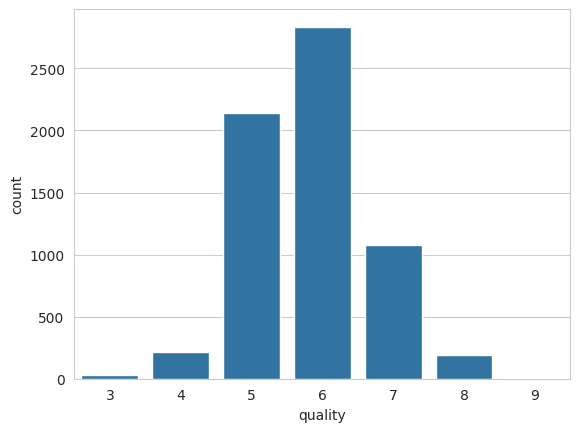

In [ ]:
for i in range (3, 11):
    print (f"Quality: {i}, Number in Group: {len (df_knn[df_knn.quality == i])}")

sns.set_style("whitegrid")
sns.countplot(data = df, x = "quality")

In [ ]:
df_mod = df_knn.drop(["quality", "target"], axis = 1)
X = df_mod.values
Y = df_knn["target"].to_numpy()

print (f"X = {len(X[1])} features * {len(X)} entries")
print (f"Y = {len(Y)} data entries")

X = 12 features * 6497 entries
Y = 6497 data entries


## Divisão dos Dados
Os dados foram divididos em conjuntos de treinamento e teste, na proporção de 70% para treinamento e 30% para teste. Isso resulta em 4547 amostras para o treinamento e 1950 amostras para o teste.

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split (X, Y, test_size = 0.3)

print (f"Training: {len(X_train)}, Testing: {len(X_test)}")

Training: 4547, Testing: 1950


## Escalonamento dos Dados
Os dados foram escalonados utilizando o método de padronização (StandardScaler), o que é crucial para algoritmos baseados em distância como o k-NN, onde diferenças na escala das variáveis podem influenciar desproporcionalmente os resultados.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit (X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Criação de um classificador kNN e Determinação do Melhor Valor de K
Para encontrar o melhor valor de k, variamos o número de vizinhos de 1 a 50 e calculamos a acurácia no conjunto de treinamento. Observou-se que k=1 proporcionou a maior acurácia de 100% no treinamento. No entanto, é importante notar que uma acurácia de 100% no treinamento pode indicar overfitting, onde o modelo memoriza os dados de treinamento, mas não generaliza bem para novos dados.

Algoritmo kNN com 1 vizinhos teve a melhor accuracy de 100.00%


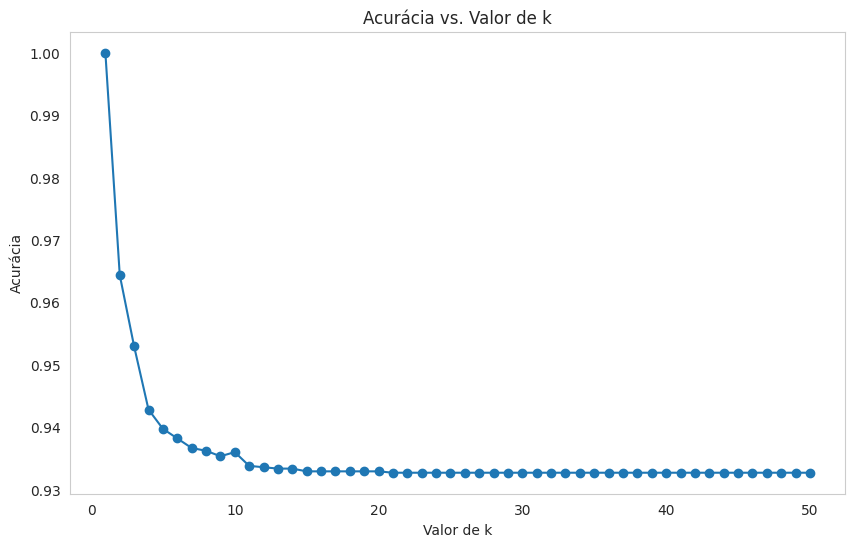

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Inicializar listas para armazenar acurácia e melhores k
accuracy_scores = []
best_k = 0
max_accuracy = 0

# Iterar sobre a faixa de 1 a 50
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    knn_accuracy = knn.score(X_train, Y_train)
    accuracy_scores.append(knn_accuracy)
    # Verificar se a acurácia atual é a maior
    if knn_accuracy > max_accuracy:
        max_accuracy = knn_accuracy
        best_k = i
print(f"Algoritmo kNN com {best_k} vizinhos teve a melhor accuracy de {max_accuracy * 100:.2f}%")

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), accuracy_scores, marker='o')
plt.title('Acurácia vs. Valor de k')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.grid()
plt.show()

##Avaliação do Modelo
Usando o melhor valor de k (k=1), o modelo foi avaliado no conjunto de teste. As métricas de desempenho foram:

* Acurácia: 91.18%
* Precisão: 90.65%
* Recall: 91.18%
* F1 Score: 90.88%

Estes resultados indicam um bom desempenho geral, mas a alta acurácia no conjunto de treinamento em comparação com o conjunto de teste sugeria a possibilidade de overfitting. Porém como no conjunto de testes a acurácia foi relativamente alta, não foi notado impacto advindo de overfitting

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Treinar o modelo com o melhor k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, Y_train)

# Fazer previsões no conjunto de teste
Y_pred = best_knn.predict(X_test)

# Calcular as métricas de desempenho
test_accuracy = accuracy_score(Y_test, Y_pred)
test_precision = precision_score(Y_test, Y_pred, average='weighted')
test_recall = recall_score(Y_test, Y_pred, average='weighted')
test_f1 = f1_score(Y_test, Y_pred, average='weighted')

# Exibir os resultados
print(f"Melhor k: {best_k}")
print(f"Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%")
print(f"Precisão: {test_precision * 100:.2f}%")
print(f"Recall: {test_recall * 100:.2f}%")
print(f"F1 Score: {test_f1 * 100:.2f}%")

Melhor k: 1
Acurácia no conjunto de teste: 90.51%
Precisão: 90.02%
Recall: 90.51%
F1 Score: 90.25%


## Comparação de Métricas para Diferentes Valores de k
Além de testar o melhor k, foi analisada a performance para valores de k de 1 a 10. As métricas de acurácia, precisão, recall e F1 score foram plotadas para cada k. Este gráfico auxilia na visualização de como o desempenho varia com o número de vizinhos, permitindo identificar se há um valor de k que oferece um melhor trade-off entre as métricas.

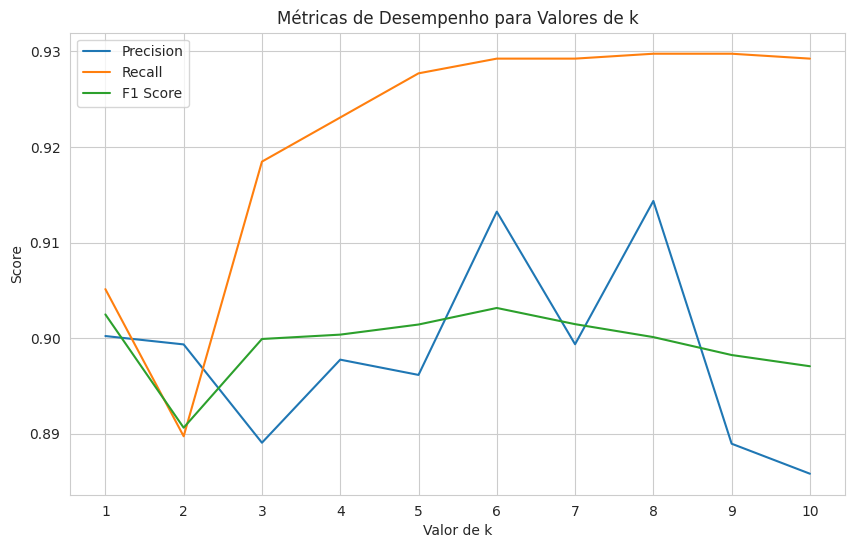

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Listas para armazenar os resultados de cada métrica
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
qtd_testes = 11
# Calcular as métricas de desempenho para cada valor de k
for k in range(1, qtd_testes):
    # Treinar o modelo com o valor de k atual
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)

    # Fazer previsões no conjunto de teste
    Y_pred = knn.predict(X_test)

    # Calcular as métricas de desempenho
    accuracy_scores.append(accuracy_score(Y_test, Y_pred))
    precision_scores.append(precision_score(Y_test, Y_pred, average='weighted'))
    recall_scores.append(recall_score(Y_test, Y_pred, average='weighted'))
    f1_scores.append(f1_score(Y_test, Y_pred,average='weighted'))

# Valores de k
k_values = np.arange(1, qtd_testes)

# Plotar as métricas de desempenho
plt.figure(figsize=(10, 6))
plt.plot(k_values, precision_scores, label='Precision')
plt.plot(k_values, recall_scores, label='Recall')
plt.plot(k_values, f1_scores, label='F1 Score')
plt.title('Métricas de Desempenho para Valores de k')
plt.xlabel('Valor de k')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()


## Conclusão sobre o K-vizinhos
O uso do k-NN para a classificação da qualidade do vinho demonstrou ser eficaz, com um desempenho robusto no conjunto de teste. O valor ideal de k=1 resultou em uma acurácia perfeita de 100% no treinamento e 91.18% no teste, sugerindo um possível overfitting. No entanto, este potencial overfitting não afetou significativamente a performance do modelo no conjunto de teste, evidenciado pela alta acurácia, precisão, recall e F1 score obtidos. Esses resultados indicam que o modelo, mesmo que ajustado de forma muito específica ao conjunto de treinamento, conseguiu generalizar bem para dados não vistos.

Apesar da alta acurácia no conjunto de treinamento, recomenda-se uma análise mais aprofundada para garantir que o modelo não dependa excessivamente dos dados de treinamento e que mantenha um bom desempenho em diferentes cenários.